In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Current 3-hour Weather to Predict Future 3-hour Alarm Volume (Level)

In [2]:
fire_data = pd.read_csv('E:\hz_fire_cnt_3h.csv', encoding = 'gbk')
fire_data.shape

(2951, 32)

In [3]:
fire_data

,hz_time,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Td,RRR,tR,E,Tg,E',sss,time_1,city_code_x,city_code_y
0,2021/3/20 5:00,12.0,756.5,760.4,0.0,95,从西北方吹来的风,2.0,NaN,6.0,...,11.2,19,12.0,NaN,NaN,NaN,NaN,2021/3/20 5:00,1,4
1,2021/3/20 8:00,12.1,758.2,762.2,1.7,87,从西北偏北方向吹来的风,4.0,NaN,8.0,...,10.0,19,12.0,NaN,NaN,NaN,NaN,2021/3/20 8:00,1,3
2,2021/3/20 11:00,12.1,758.8,762.8,0.6,83,从西北方吹来的风,4.0,NaN,9.0,...,9.3,19,12.0,NaN,NaN,NaN,NaN,2021/3/20 11:00,0,1
3,2021/3/20 14:00,11.7,757.9,761.9,-0.9,78,从西北偏北方向吹来的风,4.0,NaN,9.0,...,8.0,0.6,12.0,NaN,NaN,NaN,NaN,2021/3/20 14:00,0,0
4,2021/3/20 17:00,10.8,759.0,763.0,1.1,79,从西北偏北方向吹来的风,4.0,NaN,10.0,...,7.3,无降水,12.0,NaN,NaN,NaN,NaN,2021/3/20 17:00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,2022/3/26 5:00,14.6,755.3,759.1,2.4,74,从西北方吹来的风,4.0,NaN,11.0,...,10.0,9,12.0,NaN,NaN,NaN,NaN,2022/3/26 5:00,0,2
2947,2022/3/26 8:00,14.6,758.1,762.0,2.8,71,从西北偏北方向吹来的风,4.0,NaN,11.0,...,9.4,5,12.0,NaN,NaN,NaN,NaN,2022/3/26 8:00,2,4
2948,2022/3/26 11:00,15.6,758.5,762.4,0.4,63,从西北方吹来的风,5.0,NaN,11.0,...,8.6,0.6,12.0,NaN,NaN,NaN,NaN,2022/3/26 11:00,2,4
2949,2022/3/26 14:00,16.2,757.9,761.8,-0.6,62,从西北偏西方向吹来的风,2.0,NaN,11.0,...,8.9,0.3,12.0,NaN,NaN,NaN,NaN,2022/3/26 14:00,4,4


In [4]:
fire_data.loc[(fire_data['city_code_y'] == 0), 'y_manual'] = 1
fire_data.loc[(fire_data['city_code_y'] >= 1) & (fire_data['city_code_y'] <= 3), 'y_manual'] = 2
fire_data.loc[(fire_data['city_code_y'] >= 4) & (fire_data['city_code_y'] <= 8), 'y_manual'] = 3
fire_data.loc[(fire_data['city_code_y'] >= 9) & (fire_data['city_code_y'] <= 19), 'y_manual'] = 4
fire_data.loc[(fire_data['city_code_y'] >= 20), 'y_manual'] = 5
fire_data

,hz_time,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,RRR,tR,E,Tg,E',sss,time_1,city_code_x,city_code_y,y_manual
0,2021/3/20 5:00,12.0,756.5,760.4,0.0,95,从西北方吹来的风,2.0,NaN,6.0,...,19,12.0,NaN,NaN,NaN,NaN,2021/3/20 5:00,1,4,3.0
1,2021/3/20 8:00,12.1,758.2,762.2,1.7,87,从西北偏北方向吹来的风,4.0,NaN,8.0,...,19,12.0,NaN,NaN,NaN,NaN,2021/3/20 8:00,1,3,2.0
2,2021/3/20 11:00,12.1,758.8,762.8,0.6,83,从西北方吹来的风,4.0,NaN,9.0,...,19,12.0,NaN,NaN,NaN,NaN,2021/3/20 11:00,0,1,2.0
3,2021/3/20 14:00,11.7,757.9,761.9,-0.9,78,从西北偏北方向吹来的风,4.0,NaN,9.0,...,0.6,12.0,NaN,NaN,NaN,NaN,2021/3/20 14:00,0,0,1.0
4,2021/3/20 17:00,10.8,759.0,763.0,1.1,79,从西北偏北方向吹来的风,4.0,NaN,10.0,...,无降水,12.0,NaN,NaN,NaN,NaN,2021/3/20 17:00,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,2022/3/26 5:00,14.6,755.3,759.1,2.4,74,从西北方吹来的风,4.0,NaN,11.0,...,9,12.0,NaN,NaN,NaN,NaN,2022/3/26 5:00,0,2,2.0
2947,2022/3/26 8:00,14.6,758.1,762.0,2.8,71,从西北偏北方向吹来的风,4.0,NaN,11.0,...,5,12.0,NaN,NaN,NaN,NaN,2022/3/26 8:00,2,4,3.0
2948,2022/3/26 11:00,15.6,758.5,762.4,0.4,63,从西北方吹来的风,5.0,NaN,11.0,...,0.6,12.0,NaN,NaN,NaN,NaN,2022/3/26 11:00,2,4,3.0
2949,2022/3/26 14:00,16.2,757.9,761.8,-0.6,62,从西北偏西方向吹来的风,2.0,NaN,11.0,...,0.3,12.0,NaN,NaN,NaN,NaN,2022/3/26 14:00,4,4,3.0


In [5]:
fire_data.loc[(fire_data['city_code_y'] >= 0) & (fire_data['city_code_y'] <= 6), 'y_kmeans'] = 1
fire_data.loc[(fire_data['city_code_y'] >= 7) & (fire_data['city_code_y'] <= 14), 'y_kmeans'] = 2
fire_data.loc[(fire_data['city_code_y'] >= 15) & (fire_data['city_code_y'] <= 30), 'y_kmeans'] = 3
fire_data.loc[(fire_data['city_code_y'] >= 31) & (fire_data['city_code_y'] <= 62), 'y_kmeans'] = 4
fire_data.loc[(fire_data['city_code_y'] >= 63), 'y_kmeans'] = 5
fire_data

,hz_time,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,tR,E,Tg,E',sss,time_1,city_code_x,city_code_y,y_manual,y_kmeans
0,2021/3/20 5:00,12.0,756.5,760.4,0.0,95,从西北方吹来的风,2.0,NaN,6.0,...,12.0,NaN,NaN,NaN,NaN,2021/3/20 5:00,1,4,3.0,1.0
1,2021/3/20 8:00,12.1,758.2,762.2,1.7,87,从西北偏北方向吹来的风,4.0,NaN,8.0,...,12.0,NaN,NaN,NaN,NaN,2021/3/20 8:00,1,3,2.0,1.0
2,2021/3/20 11:00,12.1,758.8,762.8,0.6,83,从西北方吹来的风,4.0,NaN,9.0,...,12.0,NaN,NaN,NaN,NaN,2021/3/20 11:00,0,1,2.0,1.0
3,2021/3/20 14:00,11.7,757.9,761.9,-0.9,78,从西北偏北方向吹来的风,4.0,NaN,9.0,...,12.0,NaN,NaN,NaN,NaN,2021/3/20 14:00,0,0,1.0,1.0
4,2021/3/20 17:00,10.8,759.0,763.0,1.1,79,从西北偏北方向吹来的风,4.0,NaN,10.0,...,12.0,NaN,NaN,NaN,NaN,2021/3/20 17:00,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,2022/3/26 5:00,14.6,755.3,759.1,2.4,74,从西北方吹来的风,4.0,NaN,11.0,...,12.0,NaN,NaN,NaN,NaN,2022/3/26 5:00,0,2,2.0,1.0
2947,2022/3/26 8:00,14.6,758.1,762.0,2.8,71,从西北偏北方向吹来的风,4.0,NaN,11.0,...,12.0,NaN,NaN,NaN,NaN,2022/3/26 8:00,2,4,3.0,1.0
2948,2022/3/26 11:00,15.6,758.5,762.4,0.4,63,从西北方吹来的风,5.0,NaN,11.0,...,12.0,NaN,NaN,NaN,NaN,2022/3/26 11:00,2,4,3.0,1.0
2949,2022/3/26 14:00,16.2,757.9,761.8,-0.6,62,从西北偏西方向吹来的风,2.0,NaN,11.0,...,12.0,NaN,NaN,NaN,NaN,2022/3/26 14:00,4,4,3.0,1.0


### Now label y corresponds to the current 3-hour weather, we need to shift the next label y aligned to the current 3-hour weather, so that we can use the current 3-hour weather to predict the future 3-hour label y.

In [6]:
import copy
fire_new = copy.deepcopy(fire_data)

In [7]:
fire_new = fire_new.iloc[0:(fire_data.shape[0]-1),]
fire_new

,hz_time,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,tR,E,Tg,E',sss,time_1,city_code_x,city_code_y,y_manual,y_kmeans
0,2021/3/20 5:00,12.0,756.5,760.4,0.0,95,从西北方吹来的风,2.0,NaN,6.0,...,12.0,NaN,NaN,NaN,NaN,2021/3/20 5:00,1,4,3.0,1.0
1,2021/3/20 8:00,12.1,758.2,762.2,1.7,87,从西北偏北方向吹来的风,4.0,NaN,8.0,...,12.0,NaN,NaN,NaN,NaN,2021/3/20 8:00,1,3,2.0,1.0
2,2021/3/20 11:00,12.1,758.8,762.8,0.6,83,从西北方吹来的风,4.0,NaN,9.0,...,12.0,NaN,NaN,NaN,NaN,2021/3/20 11:00,0,1,2.0,1.0
3,2021/3/20 14:00,11.7,757.9,761.9,-0.9,78,从西北偏北方向吹来的风,4.0,NaN,9.0,...,12.0,NaN,NaN,NaN,NaN,2021/3/20 14:00,0,0,1.0,1.0
4,2021/3/20 17:00,10.8,759.0,763.0,1.1,79,从西北偏北方向吹来的风,4.0,NaN,10.0,...,12.0,NaN,NaN,NaN,NaN,2021/3/20 17:00,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,2022/3/26 2:00,16.1,752.9,756.7,1.1,73,从西北偏北方向吹来的风,5.0,NaN,10.0,...,12.0,NaN,NaN,NaN,NaN,2022/3/26 2:00,0,4,3.0,1.0
2946,2022/3/26 5:00,14.6,755.3,759.1,2.4,74,从西北方吹来的风,4.0,NaN,11.0,...,12.0,NaN,NaN,NaN,NaN,2022/3/26 5:00,0,2,2.0,1.0
2947,2022/3/26 8:00,14.6,758.1,762.0,2.8,71,从西北偏北方向吹来的风,4.0,NaN,11.0,...,12.0,NaN,NaN,NaN,NaN,2022/3/26 8:00,2,4,3.0,1.0
2948,2022/3/26 11:00,15.6,758.5,762.4,0.4,63,从西北方吹来的风,5.0,NaN,11.0,...,12.0,NaN,NaN,NaN,NaN,2022/3/26 11:00,2,4,3.0,1.0


In [8]:
fire_new.loc[:, 'city_code_y'] = np.array(fire_data.loc[1:fire_data.shape[0], 'city_code_y'])
fire_new.loc[:, 'y_manual'] = np.array(fire_data.loc[1:fire_data.shape[0], 'y_manual'])
fire_new.loc[:, 'y_kmeans'] = np.array(fire_data.loc[1:fire_data.shape[0], 'y_kmeans'])
fire_new

,hz_time,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,tR,E,Tg,E',sss,time_1,city_code_x,city_code_y,y_manual,y_kmeans
0,2021/3/20 5:00,12.0,756.5,760.4,0.0,95,从西北方吹来的风,2.0,NaN,6.0,...,12.0,NaN,NaN,NaN,NaN,2021/3/20 5:00,1,3,2.0,1.0
1,2021/3/20 8:00,12.1,758.2,762.2,1.7,87,从西北偏北方向吹来的风,4.0,NaN,8.0,...,12.0,NaN,NaN,NaN,NaN,2021/3/20 8:00,1,1,2.0,1.0
2,2021/3/20 11:00,12.1,758.8,762.8,0.6,83,从西北方吹来的风,4.0,NaN,9.0,...,12.0,NaN,NaN,NaN,NaN,2021/3/20 11:00,0,0,1.0,1.0
3,2021/3/20 14:00,11.7,757.9,761.9,-0.9,78,从西北偏北方向吹来的风,4.0,NaN,9.0,...,12.0,NaN,NaN,NaN,NaN,2021/3/20 14:00,0,0,1.0,1.0
4,2021/3/20 17:00,10.8,759.0,763.0,1.1,79,从西北偏北方向吹来的风,4.0,NaN,10.0,...,12.0,NaN,NaN,NaN,NaN,2021/3/20 17:00,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,2022/3/26 2:00,16.1,752.9,756.7,1.1,73,从西北偏北方向吹来的风,5.0,NaN,10.0,...,12.0,NaN,NaN,NaN,NaN,2022/3/26 2:00,0,2,2.0,1.0
2946,2022/3/26 5:00,14.6,755.3,759.1,2.4,74,从西北方吹来的风,4.0,NaN,11.0,...,12.0,NaN,NaN,NaN,NaN,2022/3/26 5:00,0,4,3.0,1.0
2947,2022/3/26 8:00,14.6,758.1,762.0,2.8,71,从西北偏北方向吹来的风,4.0,NaN,11.0,...,12.0,NaN,NaN,NaN,NaN,2022/3/26 8:00,2,4,3.0,1.0
2948,2022/3/26 11:00,15.6,758.5,762.4,0.4,63,从西北方吹来的风,5.0,NaN,11.0,...,12.0,NaN,NaN,NaN,NaN,2022/3/26 11:00,2,4,3.0,1.0


In [14]:
target_cols = ['T', 'Po', 'P', 'Pa', 'U', 'Td', 'Tn', 'Tx', 'y_manual', 'y_kmeans']
x_cols = ['T', 'Po', 'P', 'Pa', 'U', 'Td', 'Tn', 'Tx']

In [15]:
whole_df = fire_new[target_cols]
whole_df

,T,Po,P,Pa,U,Td,Tn,Tx,y_manual,y_kmeans
0,12.0,756.5,760.4,0.0,95,11.2,11.0,13.0,2.0,1.0
1,12.1,758.2,762.2,1.7,87,10.0,11.2,13.0,2.0,1.0
2,12.1,758.8,762.8,0.6,83,9.3,11.3,13.0,1.0,1.0
3,11.7,757.9,761.9,-0.9,78,8.0,11.5,13.0,1.0,1.0
4,10.8,759.0,763.0,1.1,79,7.3,10.8,12.8,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2945,16.1,752.9,756.7,1.1,73,11.3,15.2,22.3,2.0,1.0
2946,14.6,755.3,759.1,2.4,74,10.0,14.6,22.3,3.0,1.0
2947,14.6,758.1,762.0,2.8,71,9.4,14.0,22.3,3.0,1.0
2948,15.6,758.5,762.4,0.4,63,8.6,14.0,NaN,3.0,1.0


In [16]:
whole_df.isna().any()

T           False
Po          False
P           False
Pa           True
U           False
Td          False
Tn           True
Tx           True
y_manual    False
y_kmeans    False
dtype: bool

In [17]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp_mean.fit(whole_df)
whole_imp_np = imp_mean.transform(whole_df)   # ndarray
whole_imp_np

array([[ 12.        , 756.5       , 760.4       , ...,  13.        ,
          2.        ,   1.        ],
       [ 12.1       , 758.2       , 762.2       , ...,  13.        ,
          2.        ,   1.        ],
       [ 12.1       , 758.8       , 762.8       , ...,  13.        ,
          1.        ,   1.        ],
       ...,
       [ 14.6       , 758.1       , 762.        , ...,  22.3       ,
          3.        ,   1.        ],
       [ 15.6       , 758.5       , 762.4       , ...,  22.95314501,
          3.        ,   1.        ],
       [ 16.2       , 757.9       , 761.8       , ...,  22.95314501,
          3.        ,   1.        ]])

In [18]:
whole_imp_df = pd.DataFrame(whole_imp_np, columns = target_cols)
whole_imp_df

,T,Po,P,Pa,U,Td,Tn,Tx,y_manual,y_kmeans
0,12.0,756.5,760.4,0.0,95.0,11.2,11.0,13.000000,2.0,1.0
1,12.1,758.2,762.2,1.7,87.0,10.0,11.2,13.000000,2.0,1.0
2,12.1,758.8,762.8,0.6,83.0,9.3,11.3,13.000000,1.0,1.0
3,11.7,757.9,761.9,-0.9,78.0,8.0,11.5,13.000000,1.0,1.0
4,10.8,759.0,763.0,1.1,79.0,7.3,10.8,12.800000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2945,16.1,752.9,756.7,1.1,73.0,11.3,15.2,22.300000,2.0,1.0
2946,14.6,755.3,759.1,2.4,74.0,10.0,14.6,22.300000,3.0,1.0
2947,14.6,758.1,762.0,2.8,71.0,9.4,14.0,22.300000,3.0,1.0
2948,15.6,758.5,762.4,0.4,63.0,8.6,14.0,22.953145,3.0,1.0


In [19]:
whole_imp_df.isna().any()

T           False
Po          False
P           False
Pa          False
U           False
Td          False
Tn          False
Tx          False
y_manual    False
y_kmeans    False
dtype: bool

In [20]:
whole_corr = whole_imp_df.corr()
whole_corr

,T,Po,P,Pa,U,Td,Tn,Tx,y_manual,y_kmeans
T,1.000000,-0.840543,-0.844482,-0.094491,-0.117525,0.877217,0.924531,0.897910,-0.106223,-0.112751
Po,-0.840543,1.000000,0.999942,0.048205,-0.194340,-0.873545,-0.855090,-0.776719,0.004110,0.025347
P,-0.844482,0.999942,1.000000,0.047817,-0.192375,-0.876426,-0.858756,-0.781035,0.003931,0.025084
Pa,-0.094491,0.048205,0.047817,1.000000,0.201484,0.021752,0.018132,-0.015730,0.152947,0.102958
U,-0.117525,-0.194340,-0.192375,0.201484,1.000000,0.366556,0.152840,-0.028794,0.222790,0.161817
Td,0.877217,-0.873545,-0.876426,0.021752,0.366556,1.000000,0.939841,0.828401,0.013697,-0.022703
Tn,0.924531,-0.855090,-0.858756,0.018132,0.152840,0.939841,1.000000,0.872607,-0.004861,-0.036846
Tx,0.897910,-0.776719,-0.781035,-0.015730,-0.028794,0.828401,0.872607,1.000000,0.002760,-0.018652
y_manual,-0.106223,0.004110,0.003931,0.152947,0.222790,0.013697,-0.004861,0.002760,1.000000,0.708183
y_kmeans,-0.112751,0.025347,0.025084,0.102958,0.161817,-0.022703,-0.036846,-0.018652,0.708183,1.000000


In [21]:
import seaborn as sns

<AxesSubplot:>

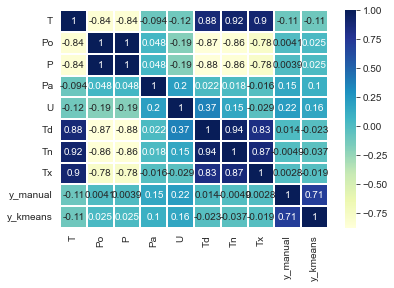

In [22]:
sns.heatmap(whole_corr, cmap = 'YlGnBu', annot = True, linewidths = 0.05)

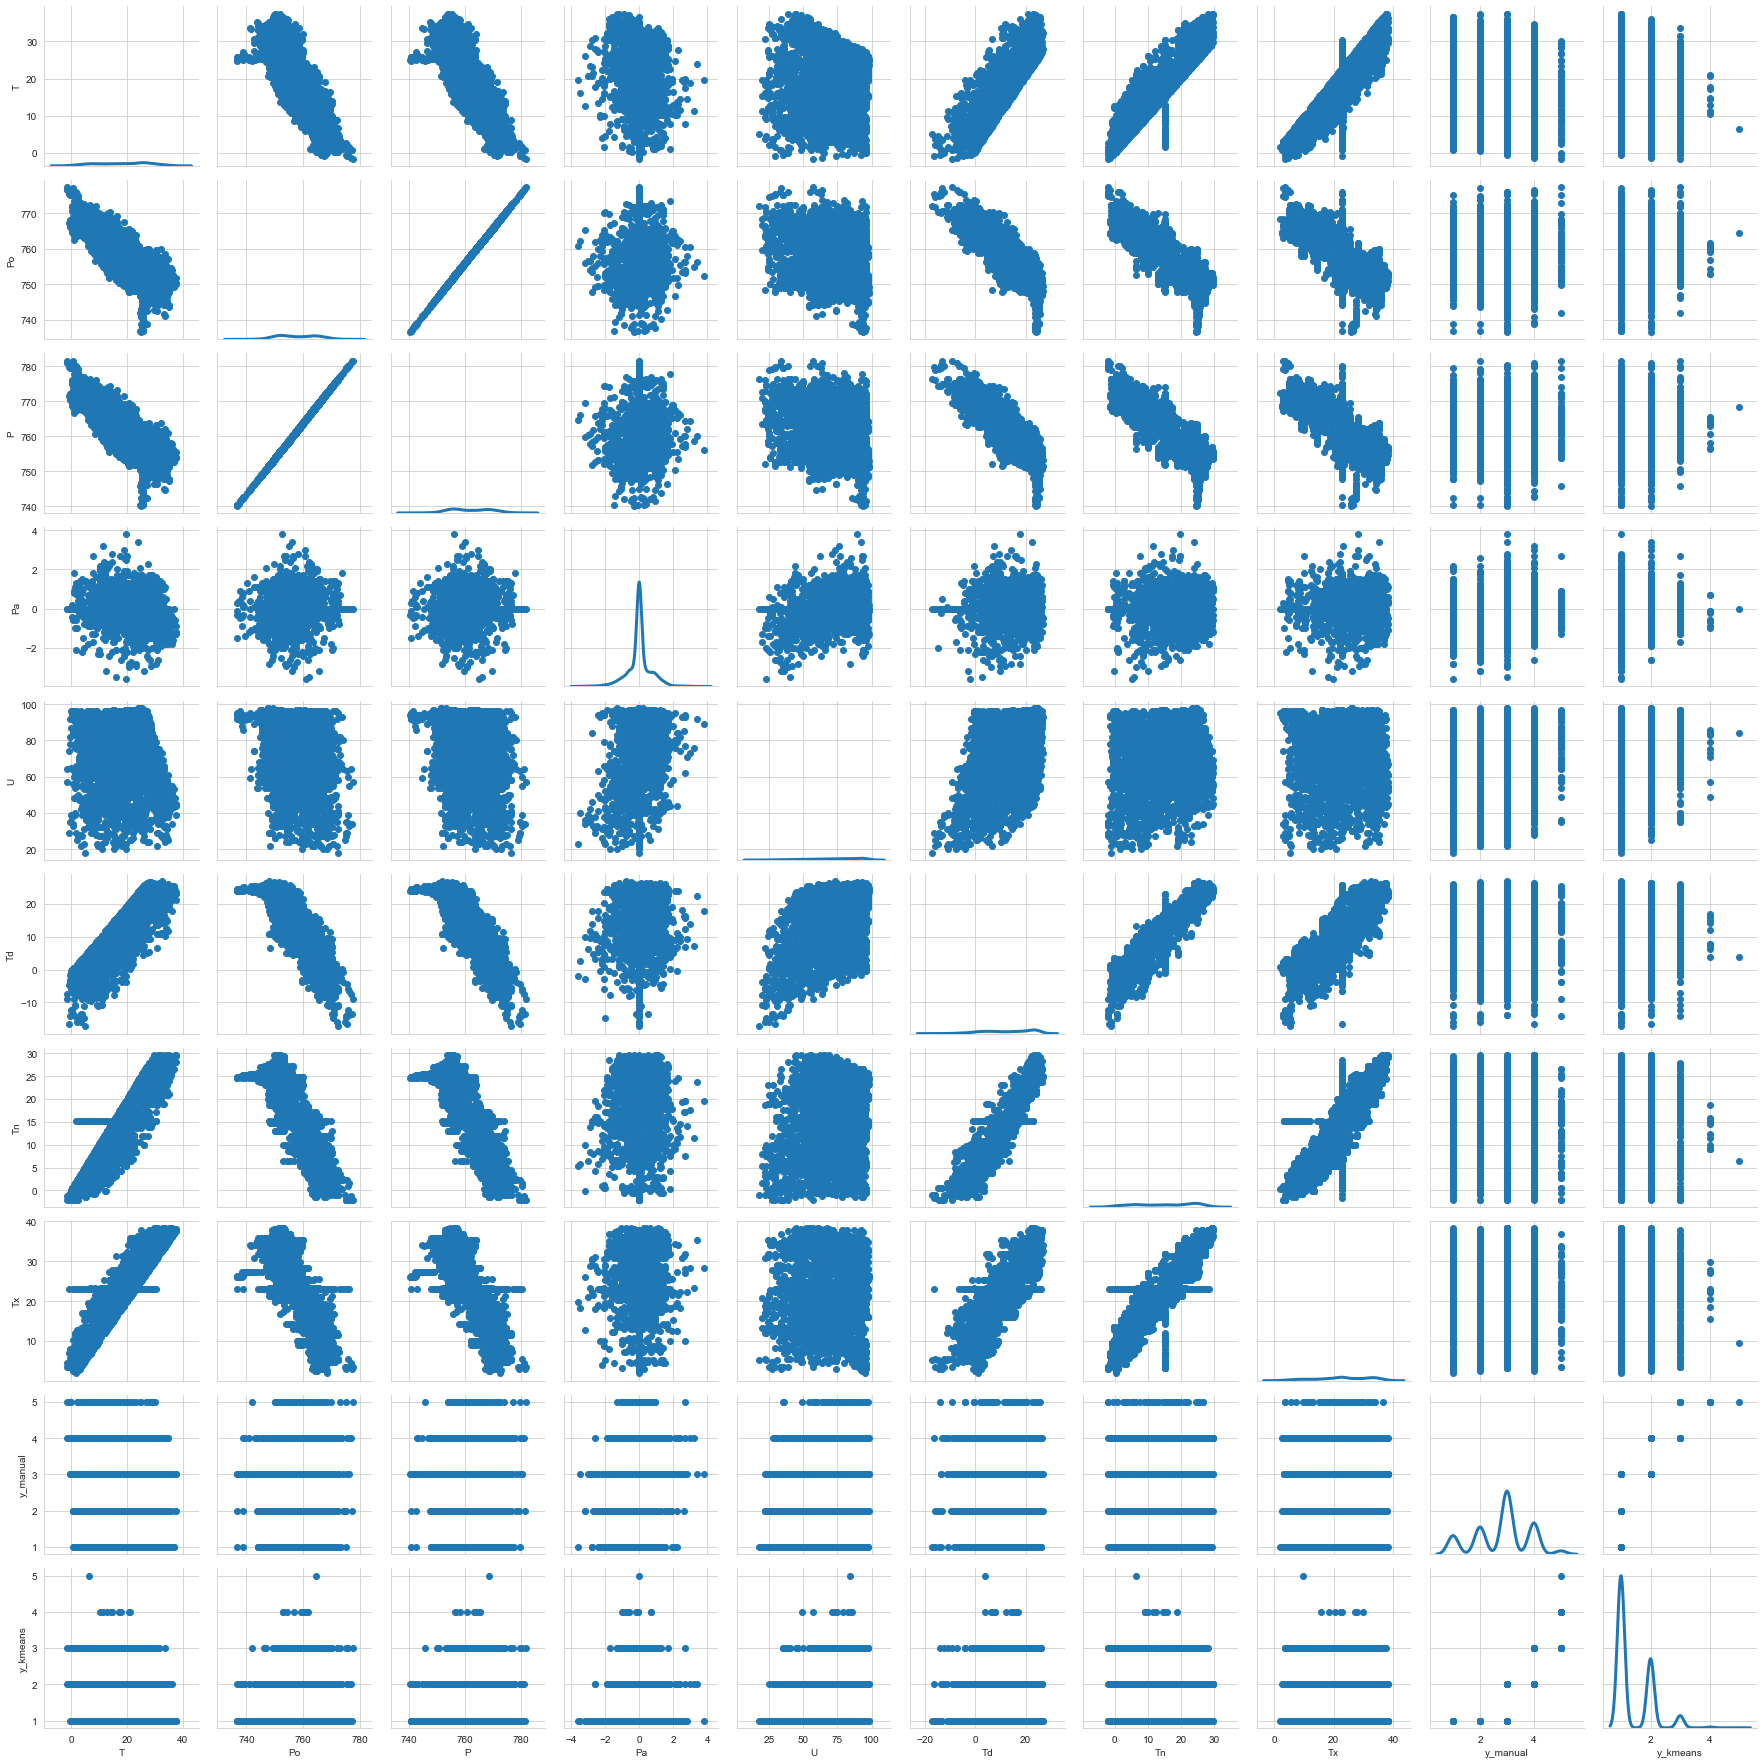

In [23]:
g = sns.PairGrid(whole_imp_df)
g.map_diag(sns.kdeplot, lw = 3)
g.map_offdiag(plt.scatter)
plt.show()

In [24]:
x_df = whole_imp_df[x_cols]
x_df

,T,Po,P,Pa,U,Td,Tn,Tx
0,12.0,756.5,760.4,0.0,95.0,11.2,11.0,13.000000
1,12.1,758.2,762.2,1.7,87.0,10.0,11.2,13.000000
2,12.1,758.8,762.8,0.6,83.0,9.3,11.3,13.000000
3,11.7,757.9,761.9,-0.9,78.0,8.0,11.5,13.000000
4,10.8,759.0,763.0,1.1,79.0,7.3,10.8,12.800000
...,...,...,...,...,...,...,...,...
2945,16.1,752.9,756.7,1.1,73.0,11.3,15.2,22.300000
2946,14.6,755.3,759.1,2.4,74.0,10.0,14.6,22.300000
2947,14.6,758.1,762.0,2.8,71.0,9.4,14.0,22.300000
2948,15.6,758.5,762.4,0.4,63.0,8.6,14.0,22.953145


In [25]:
# we only apply data transformation to feature variables x
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler([0, 1])
x_mm_np = mm_scaler.fit_transform(x_df)
x_mm_df = pd.DataFrame(x_mm_np, columns = x_cols)
x_mm_df

,T,Po,P,Pa,U,Td,Tn,Tx
0,0.346154,0.488998,0.487923,0.486486,0.9625,0.644796,0.411950,0.305785
1,0.348718,0.530562,0.531401,0.716216,0.8625,0.617647,0.418239,0.305785
2,0.348718,0.545232,0.545894,0.567568,0.8125,0.601810,0.421384,0.305785
3,0.338462,0.523227,0.524155,0.364865,0.7500,0.572398,0.427673,0.305785
4,0.315385,0.550122,0.550725,0.635135,0.7625,0.556561,0.405660,0.300275
...,...,...,...,...,...,...,...,...
2945,0.451282,0.400978,0.398551,0.635135,0.6875,0.647059,0.544025,0.561983
2946,0.412821,0.459658,0.456522,0.810811,0.7000,0.617647,0.525157,0.561983
2947,0.412821,0.528117,0.526570,0.864865,0.6625,0.604072,0.506289,0.561983
2948,0.438462,0.537897,0.536232,0.540541,0.5625,0.585973,0.506289,0.579976


In [26]:
# axis = 1 adds more columns/features
whole_mm_df = pd.concat([x_mm_df, whole_df[['y_manual', 'y_kmeans']]], axis = 1)
whole_mm_df

,T,Po,P,Pa,U,Td,Tn,Tx,y_manual,y_kmeans
0,0.346154,0.488998,0.487923,0.486486,0.9625,0.644796,0.411950,0.305785,2.0,1.0
1,0.348718,0.530562,0.531401,0.716216,0.8625,0.617647,0.418239,0.305785,2.0,1.0
2,0.348718,0.545232,0.545894,0.567568,0.8125,0.601810,0.421384,0.305785,1.0,1.0
3,0.338462,0.523227,0.524155,0.364865,0.7500,0.572398,0.427673,0.305785,1.0,1.0
4,0.315385,0.550122,0.550725,0.635135,0.7625,0.556561,0.405660,0.300275,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2945,0.451282,0.400978,0.398551,0.635135,0.6875,0.647059,0.544025,0.561983,2.0,1.0
2946,0.412821,0.459658,0.456522,0.810811,0.7000,0.617647,0.525157,0.561983,3.0,1.0
2947,0.412821,0.528117,0.526570,0.864865,0.6625,0.604072,0.506289,0.561983,3.0,1.0
2948,0.438462,0.537897,0.536232,0.540541,0.5625,0.585973,0.506289,0.579976,3.0,1.0


<AxesSubplot:>

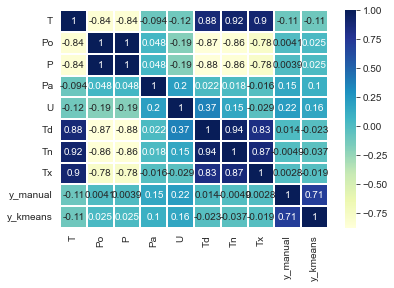

In [27]:
whole_mm_corr = whole_mm_df.corr()
sns.heatmap(whole_mm_corr, cmap = 'YlGnBu', annot = True, linewidths = 0.05)

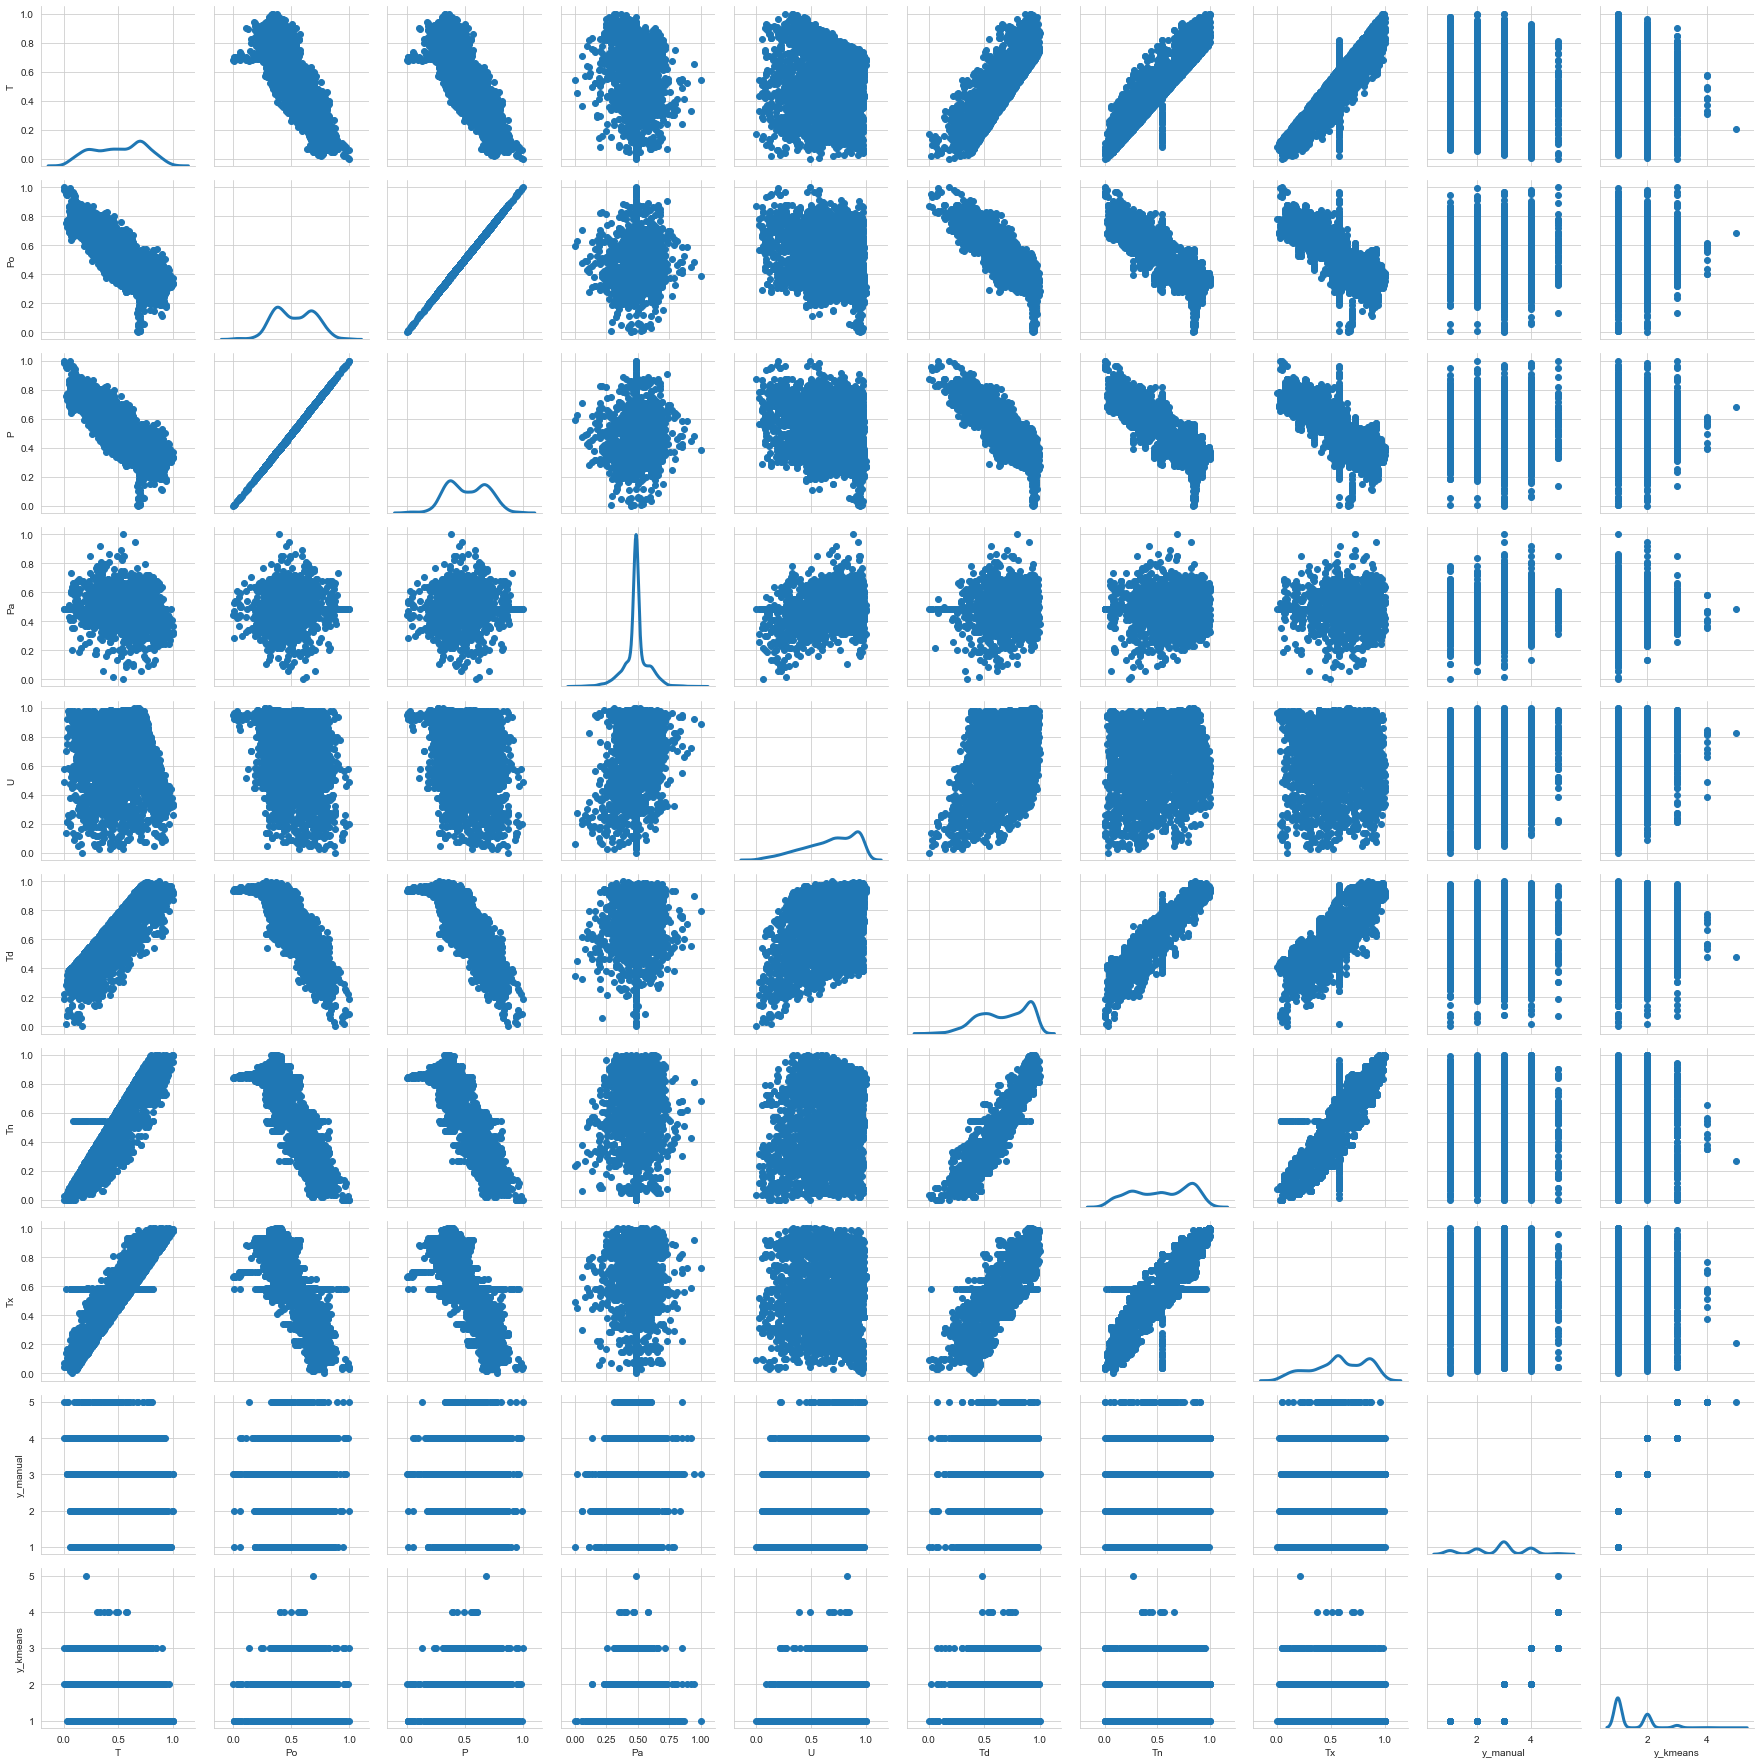

In [28]:
g_mm = sns.PairGrid(whole_mm_df)
g_mm.map_diag(sns.kdeplot, lw = 3)
g_mm.map_offdiag(plt.scatter)
plt.show()

In [29]:
plt.show()
n_total = x_mm_df.shape[0]
n_test = 240
n_train = n_total - n_test
n_total, n_train, n_test

(2950, 2710, 240)

In [32]:
x_train = x_mm_df.iloc[0:n_train, :] # n_train is not included
x_test = x_mm_df.iloc[n_train:n_total, :]
y_manual_train = whole_mm_df.loc[0:(n_train-1), 'y_manual'] # n_train-1 is included
y_manual_test = whole_mm_df.loc[n_train:(n_total-1), 'y_manual']
y_kmeans_train = whole_mm_df.loc[0:(n_train-1), 'y_kmeans'] # n_train-1 is included
y_kmeans_test = whole_mm_df.loc[n_train:(n_total-1), 'y_kmeans']
print(x_train.shape, y_manual_train.shape)
print(x_test.shape, y_manual_test.shape)
print(x_train.shape, y_kmeans_train.shape)
print(x_test.shape, y_kmeans_test.shape)

(2710, 8) (2710,)
(240, 8) (240,)
(2710, 8) (2710,)
(240, 8) (240,)


In [63]:
import xgboost as xgb

In [91]:
xgb_manual = xgb.XGBClassifier(objective = 'multi:softprob', num_class = 5, eval_metric = 'auc',
                               booster = 'gbtree', random_state = 1)
xgb_manual.fit(x_train, y_manual_train-1)
# Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1. 2. 3. 4. 5.]
# needs to -1 for ground truth y
y_pred_manual_xgb = xgb_manual.predict(x_test)
xgb_manual.score(x_test, y_manual_test-1)

0.42083333333333334

Text(0, 0.5, 'fire level')

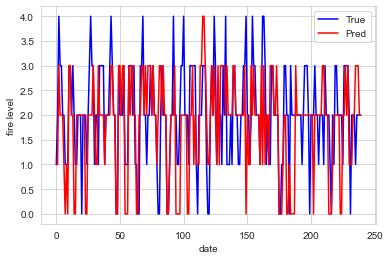

In [92]:
plt.plot(np.array(y_manual_test-1), color = "blue")
plt.plot(y_pred_manual_xgb, color = "red")
plt.legend(["True", "Pred"])
plt.xlabel("date")
plt.ylabel("fire level")

In [38]:
# method = 'xgb', 'svc', 'mlp'
def One_Accuracy(y_true, y_pred, method):
    if method == 'xgb':
        one_level_err = y_pred - (y_true - 1)
    elif method == 'svc' or 'mlp':
        one_level_err = y_pred - y_true
    total_one_correct = 0
    for v in one_level_err:
        if np.abs(v) == 1:
            total_one_correct += 1
    return total_one_correct/n_test

In [193]:
One_Accuracy(y_manual_test, y_pred_manual_xgb, 'xgb')

0.43333333333333335

In [82]:
xgb_kmeans = xgb.XGBClassifier(booster = 'gbtree', random_state = 1)
xgb_kmeans.fit(x_train, y_kmeans_train-1)
# Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1. 2. 3. 4. 5.]
# needs to -1 for ground truth y
y_pred_kmeans_xgb = xgb_kmeans.predict(x_test)
xgb_kmeans.score(x_test, y_kmeans_test-1)

0.575

Text(0, 0.5, 'fire level')

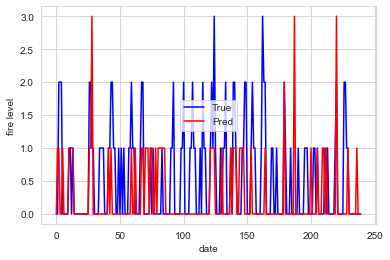

In [83]:
plt.plot(np.array(y_kmeans_test-1), color = "blue")
plt.plot(y_pred_kmeans_xgb, color = "red")
plt.legend(["True", "Pred"])
plt.xlabel("date")
plt.ylabel("fire level")

In [194]:
One_Accuracy(y_kmeans_test, y_pred_kmeans_xgb, 'xgb')

0.35

### Do not invoke Python API

In [107]:
from sklearn.metrics import accuracy_score

In [108]:
# label must be in [0, num_class), so wo need to -1 to ground truth y
dmanual_train = xgb.DMatrix(x_train, y_manual_train - 1)
dmanual_test = xgb.DMatrix(x_test)
dkmeans_train = xgb.DMatrix(x_train, y_kmeans_train - 1)
dkmeans_test = xgb.DMatrix(x_test)

In [184]:
param_manual = {'booster':'gbtree', 'verbosity':1,
                'eta':0.3, 'gamma':0,'max_depth':8, 'lambda':1, 'alpha':0,
                'objective':'multi:softmax', 'num_class':5,
                'seed':1,
                }
num_round = 200

### Hyper-parameter Tuning
- Given values of other parameters, find the best num_round (number of trees)

In [185]:
xgb.cv(param_manual, dmanual_train, num_round)

,train-mlogloss-mean,train-mlogloss-std,test-mlogloss-mean,test-mlogloss-std
0,1.413555,0.005946,1.518246,0.004280
1,1.273142,0.012780,1.464471,0.008560
2,1.162554,0.018216,1.425036,0.008080
3,1.072082,0.019371,1.400322,0.007883
4,1.005017,0.019267,1.383858,0.009911
...,...,...,...,...
195,0.046104,0.002329,1.980348,0.051487
196,0.045854,0.002339,1.982371,0.051598
197,0.045571,0.002341,1.984381,0.051929
198,0.045310,0.002356,1.985995,0.051968


In [186]:
# num_round = 10
bst_manual = xgb.train(param_manual, dmanual_train, num_round)
bst_pred_manual = bst_manual.predict(dmanual_test)
bst_acc_manual = accuracy_score(y_manual_test - 1, bst_pred_manual)
bst_acc_manual

0.38333333333333336

Text(0, 0.5, 'fire level')

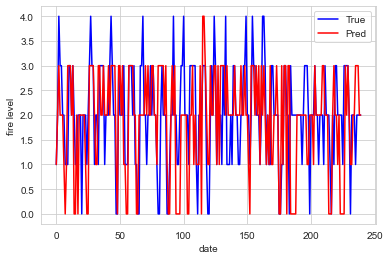

In [187]:
plt.plot(np.array(y_manual_test - 1), color = "blue")
plt.plot(bst_pred_manual, color = "red")
plt.legend(["True", "Pred"])
plt.xlabel("date")
plt.ylabel("fire level")

In [195]:
One_Accuracy(y_manual_test, bst_pred_manual, 'xgb')

0.4375

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

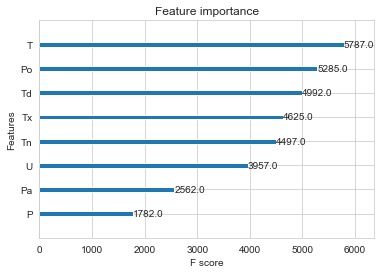

In [188]:
xgb.plot_importance(bst_manual)

In [54]:
from sklearn.svm import SVC

In [62]:
svc_manual = SVC(C = 1, kernel = "sigmoid", random_state = 1)
svc_manual.fit(x_train, y_manual_train)
y_pred_manual_svc = svc_manual.predict(x_test)
svc_manual.score(x_test, y_manual_test)

0.43333333333333335

Text(0, 0.5, 'fire level')

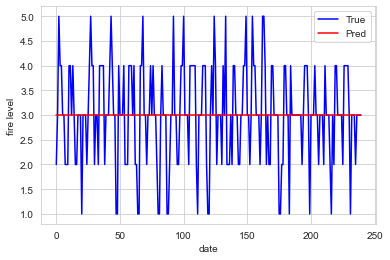

In [56]:
plt.plot(np.array(y_manual_test), color = "blue")
plt.plot(y_pred_manual_svc, color = "red")
plt.legend(["True", "Pred"])
plt.xlabel("date")
plt.ylabel("fire level")

In [196]:
One_Accuracy(y_manual_test, y_pred_manual_svc, 'svc')

0.44166666666666665

In [57]:
svc_kmeans = SVC(C = 1, kernel = "sigmoid", random_state = 1)
svc_kmeans.fit(x_train, y_kmeans_train)
y_pred_kmeans_svc = svc_kmeans.predict(x_test)
svc_kmeans.score(x_test, y_kmeans_test)

0.6041666666666666

Text(0, 0.5, 'fire level')

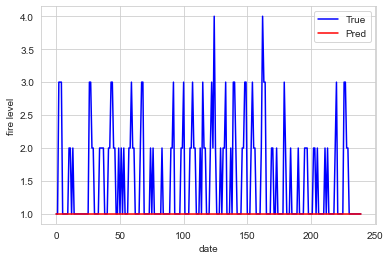

In [58]:
plt.plot(np.array(y_kmeans_test), color = "blue")
plt.plot(y_pred_kmeans_svc, color = "red")
plt.legend(["True", "Pred"])
plt.xlabel("date")
plt.ylabel("fire level")

In [197]:
One_Accuracy(y_kmeans_test, y_pred_kmeans_svc, 'svc')

0.275

In [33]:
from sklearn.neural_network import MLPClassifier

In [49]:
mlp_manual = MLPClassifier(solver = 'sgd', max_iter = 300, random_state = 1)
mlp_manual.fit(x_train, y_manual_train)
y_pred_manual_mlp = mlp_manual.predict(x_test)
mlp_manual.score(x_test, y_manual_test)

0.43333333333333335

Text(0, 0.5, 'fire level')

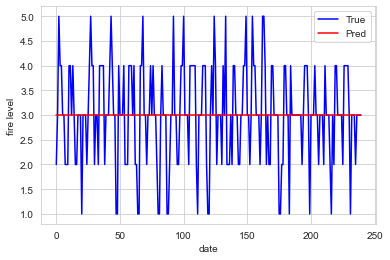

In [50]:
plt.plot(np.array(y_manual_test), color = "blue")
plt.plot(y_pred_manual_mlp, color = "red")
plt.legend(["True", "Pred"])
plt.xlabel("date")
plt.ylabel("fire level")

In [198]:
One_Accuracy(y_manual_test, y_pred_manual_mlp, 'mlp')

0.44166666666666665

In [52]:
mlp_kmeans = MLPClassifier(solver = "sgd", max_iter = 300, random_state = 1)
mlp_kmeans.fit(x_train, y_kmeans_train)
y_pred_kmeans_mlp = mlp_kmeans.predict(x_test)
mlp_kmeans.score(x_test, y_kmeans_test)

0.6041666666666666

Text(0, 0.5, 'fire level')

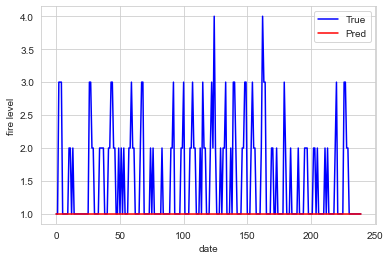

In [53]:
plt.plot(np.array(y_kmeans_test), color = "blue")
plt.plot(y_pred_kmeans_mlp, color = "red")
plt.legend(["True", "Pred"])
plt.xlabel("date")
plt.ylabel("fire level")

In [199]:
One_Accuracy(y_kmeans_test, y_pred_kmeans_mlp, 'mlp')

0.275

# Hangzhou Daily Weather + Current 3-hour Weather

In [9]:
day_weather = pd.read_csv("E:\hz_day_weather.csv", encoding = 'gbk')
day_weather.shape

(1191, 13)

In [10]:
day_weather

,Unnamed: 0.1,日期,天气状况,温度,风力,天气情况_0,天气情况_1,温度_0,温度_1,风向_0,风级_0,风向_1,风级_1
0,0,2019/1/1,阴/多云,4℃/2℃,北风1-2级/北风1-2级,阴,多云,4℃,2℃,['北风'],['1-2级'],['北风'],['1-2级']
1,1,2019/1/2,阴/阴,4℃/1℃,无持续风向1-2级/无持续风向1-2级,阴,阴,4℃,1℃,['无持续风向'],['1-2级'],['无持续风向'],['1-2级']
2,2,2019/1/3,阴/小雨,8℃/2℃,无持续风向1-2级/无持续风向1-2级,阴,小雨,8℃,2℃,['无持续风向'],['1-2级'],['无持续风向'],['1-2级']
3,3,2019/1/4,中雨/小雨,7℃/4℃,北风1-2级/北风1-2级,中雨,小雨,7℃,4℃,['北风'],['1-2级'],['北风'],['1-2级']
4,4,2019/1/5,小雨/小雨,7℃/5℃,西北风3-4级/西北风3-4级,小雨,小雨,7℃,5℃,['西北风'],['3-4级'],['西北风'],['3-4级']
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,26,2022/3/27,阴/小雨,16℃/9℃,北风1-2级/北风1-2级,阴,小雨,16℃,9℃,['北风'],['1-2级'],['北风'],['1-2级']
1187,27,2022/3/28,阴/晴,15℃/7℃,东风1-2级/东风1-2级,阴,晴,15℃,7℃,['东风'],['1-2级'],['东风'],['1-2级']
1188,28,2022/3/29,多云/阴,21℃/13℃,东风1-2级/东风1-2级,多云,阴,21℃,13℃,['东风'],['1-2级'],['东风'],['1-2级']
1189,29,2022/3/30,小雨/中雨,23℃/14℃,北风3-4级/北风3-4级,小雨,中雨,23℃,14℃,['北风'],['3-4级'],['北风'],['3-4级']


In [11]:
import re

In [12]:
for i in range(0, day_weather.shape[0]):
    # 温度
    temp = re.findall(r'\d+\.?\d*', day_weather.iloc[i, 3]) # list
    day_weather.loc[i, 'temp_0'] = float(temp[0])
    day_weather.loc[i, 'temp_1'] = float(temp[1])
day_weather

,Unnamed: 0.1,日期,天气状况,温度,风力,天气情况_0,天气情况_1,温度_0,温度_1,风向_0,风级_0,风向_1,风级_1,temp_0,temp_1
0,0,2019/1/1,阴/多云,4℃/2℃,北风1-2级/北风1-2级,阴,多云,4℃,2℃,['北风'],['1-2级'],['北风'],['1-2级'],4.0,2.0
1,1,2019/1/2,阴/阴,4℃/1℃,无持续风向1-2级/无持续风向1-2级,阴,阴,4℃,1℃,['无持续风向'],['1-2级'],['无持续风向'],['1-2级'],4.0,1.0
2,2,2019/1/3,阴/小雨,8℃/2℃,无持续风向1-2级/无持续风向1-2级,阴,小雨,8℃,2℃,['无持续风向'],['1-2级'],['无持续风向'],['1-2级'],8.0,2.0
3,3,2019/1/4,中雨/小雨,7℃/4℃,北风1-2级/北风1-2级,中雨,小雨,7℃,4℃,['北风'],['1-2级'],['北风'],['1-2级'],7.0,4.0
4,4,2019/1/5,小雨/小雨,7℃/5℃,西北风3-4级/西北风3-4级,小雨,小雨,7℃,5℃,['西北风'],['3-4级'],['西北风'],['3-4级'],7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,26,2022/3/27,阴/小雨,16℃/9℃,北风1-2级/北风1-2级,阴,小雨,16℃,9℃,['北风'],['1-2级'],['北风'],['1-2级'],16.0,9.0
1187,27,2022/3/28,阴/晴,15℃/7℃,东风1-2级/东风1-2级,阴,晴,15℃,7℃,['东风'],['1-2级'],['东风'],['1-2级'],15.0,7.0
1188,28,2022/3/29,多云/阴,21℃/13℃,东风1-2级/东风1-2级,多云,阴,21℃,13℃,['东风'],['1-2级'],['东风'],['1-2级'],21.0,13.0
1189,29,2022/3/30,小雨/中雨,23℃/14℃,北风3-4级/北风3-4级,小雨,中雨,23℃,14℃,['北风'],['3-4级'],['北风'],['3-4级'],23.0,14.0


In [13]:
for i in range(0, day_weather.shape[0]):
    # 风级
    wind_level = re.findall(r'\d+\.?\d*', day_weather.iloc[i, 12]) # list
    if len(wind_level) == 0: # row_index = 221
        day_weather.loc[i, 'wind_level_0'] = np.nan
        day_weather.loc[i, 'wind_level_1'] = np.nan
    elif len(wind_level) == 1:
        day_weather.loc[i, 'wind_level_0'] = float(wind_level[0])
        day_weather.loc[i, 'wind_level_1'] = float(wind_level[0])
    else:
        day_weather.loc[i, 'wind_level_0'] = float(wind_level[0])
        day_weather.loc[i, 'wind_level_1'] = float(wind_level[1])
day_weather

,Unnamed: 0.1,日期,天气状况,温度,风力,天气情况_0,天气情况_1,温度_0,温度_1,风向_0,风级_0,风向_1,风级_1,temp_0,temp_1,wind_level_0,wind_level_1
0,0,2019/1/1,阴/多云,4℃/2℃,北风1-2级/北风1-2级,阴,多云,4℃,2℃,['北风'],['1-2级'],['北风'],['1-2级'],4.0,2.0,1.0,2.0
1,1,2019/1/2,阴/阴,4℃/1℃,无持续风向1-2级/无持续风向1-2级,阴,阴,4℃,1℃,['无持续风向'],['1-2级'],['无持续风向'],['1-2级'],4.0,1.0,1.0,2.0
2,2,2019/1/3,阴/小雨,8℃/2℃,无持续风向1-2级/无持续风向1-2级,阴,小雨,8℃,2℃,['无持续风向'],['1-2级'],['无持续风向'],['1-2级'],8.0,2.0,1.0,2.0
3,3,2019/1/4,中雨/小雨,7℃/4℃,北风1-2级/北风1-2级,中雨,小雨,7℃,4℃,['北风'],['1-2级'],['北风'],['1-2级'],7.0,4.0,1.0,2.0
4,4,2019/1/5,小雨/小雨,7℃/5℃,西北风3-4级/西北风3-4级,小雨,小雨,7℃,5℃,['西北风'],['3-4级'],['西北风'],['3-4级'],7.0,5.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,26,2022/3/27,阴/小雨,16℃/9℃,北风1-2级/北风1-2级,阴,小雨,16℃,9℃,['北风'],['1-2级'],['北风'],['1-2级'],16.0,9.0,1.0,2.0
1187,27,2022/3/28,阴/晴,15℃/7℃,东风1-2级/东风1-2级,阴,晴,15℃,7℃,['东风'],['1-2级'],['东风'],['1-2级'],15.0,7.0,1.0,2.0
1188,28,2022/3/29,多云/阴,21℃/13℃,东风1-2级/东风1-2级,多云,阴,21℃,13℃,['东风'],['1-2级'],['东风'],['1-2级'],21.0,13.0,1.0,2.0
1189,29,2022/3/30,小雨/中雨,23℃/14℃,北风3-4级/北风3-4级,小雨,中雨,23℃,14℃,['北风'],['3-4级'],['北风'],['3-4级'],23.0,14.0,3.0,4.0


In [14]:
for i in range(0, day_weather.shape[0]):
    # 是否下雨
    is_rain = day_weather.iloc[i, 2].find('雨')
    if is_rain == -1:
        day_weather.loc[i, 'is_rain'] = 0
    else:
        day_weather.loc[i, 'is_rain'] = 1
day_weather

,Unnamed: 0.1,日期,天气状况,温度,风力,天气情况_0,天气情况_1,温度_0,温度_1,风向_0,风级_0,风向_1,风级_1,temp_0,temp_1,wind_level_0,wind_level_1,is_rain
0,0,2019/1/1,阴/多云,4℃/2℃,北风1-2级/北风1-2级,阴,多云,4℃,2℃,['北风'],['1-2级'],['北风'],['1-2级'],4.0,2.0,1.0,2.0,0.0
1,1,2019/1/2,阴/阴,4℃/1℃,无持续风向1-2级/无持续风向1-2级,阴,阴,4℃,1℃,['无持续风向'],['1-2级'],['无持续风向'],['1-2级'],4.0,1.0,1.0,2.0,0.0
2,2,2019/1/3,阴/小雨,8℃/2℃,无持续风向1-2级/无持续风向1-2级,阴,小雨,8℃,2℃,['无持续风向'],['1-2级'],['无持续风向'],['1-2级'],8.0,2.0,1.0,2.0,1.0
3,3,2019/1/4,中雨/小雨,7℃/4℃,北风1-2级/北风1-2级,中雨,小雨,7℃,4℃,['北风'],['1-2级'],['北风'],['1-2级'],7.0,4.0,1.0,2.0,1.0
4,4,2019/1/5,小雨/小雨,7℃/5℃,西北风3-4级/西北风3-4级,小雨,小雨,7℃,5℃,['西北风'],['3-4级'],['西北风'],['3-4级'],7.0,5.0,3.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,26,2022/3/27,阴/小雨,16℃/9℃,北风1-2级/北风1-2级,阴,小雨,16℃,9℃,['北风'],['1-2级'],['北风'],['1-2级'],16.0,9.0,1.0,2.0,1.0
1187,27,2022/3/28,阴/晴,15℃/7℃,东风1-2级/东风1-2级,阴,晴,15℃,7℃,['东风'],['1-2级'],['东风'],['1-2级'],15.0,7.0,1.0,2.0,0.0
1188,28,2022/3/29,多云/阴,21℃/13℃,东风1-2级/东风1-2级,多云,阴,21℃,13℃,['东风'],['1-2级'],['东风'],['1-2级'],21.0,13.0,1.0,2.0,0.0
1189,29,2022/3/30,小雨/中雨,23℃/14℃,北风3-4级/北风3-4级,小雨,中雨,23℃,14℃,['北风'],['3-4级'],['北风'],['3-4级'],23.0,14.0,3.0,4.0,1.0


In [15]:
import copy
fire_new_copy = copy.deepcopy(fire_new)
fire_new_copy.loc[:, 'temp_0'] = np.zeros(fire_new_copy.shape[0])
fire_new_copy.loc[:, 'temp_1'] = np.zeros(fire_new_copy.shape[0])
fire_new_copy.loc[:, 'wind_level_0'] = np.zeros(fire_new_copy.shape[0])
fire_new_copy.loc[:, 'wind_level_1'] = np.zeros(fire_new_copy.shape[0])
fire_new_copy.loc[:, 'is_rain'] = np.zeros(fire_new_copy.shape[0])
fire_new_copy

,hz_time,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,time_1,city_code_x,city_code_y,y_manual,y_kmeans,temp_0,temp_1,wind_level_0,wind_level_1,is_rain
0,2021/3/20 5:00,12.0,756.5,760.4,0.0,95,从西北方吹来的风,2.0,NaN,6.0,...,2021/3/20 5:00,1,3,2.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2021/3/20 8:00,12.1,758.2,762.2,1.7,87,从西北偏北方向吹来的风,4.0,NaN,8.0,...,2021/3/20 8:00,1,1,2.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2021/3/20 11:00,12.1,758.8,762.8,0.6,83,从西北方吹来的风,4.0,NaN,9.0,...,2021/3/20 11:00,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2021/3/20 14:00,11.7,757.9,761.9,-0.9,78,从西北偏北方向吹来的风,4.0,NaN,9.0,...,2021/3/20 14:00,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2021/3/20 17:00,10.8,759.0,763.0,1.1,79,从西北偏北方向吹来的风,4.0,NaN,10.0,...,2021/3/20 17:00,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,2022/3/26 2:00,16.1,752.9,756.7,1.1,73,从西北偏北方向吹来的风,5.0,NaN,10.0,...,2022/3/26 2:00,0,2,2.0,1.0,0.0,0.0,0.0,0.0,0.0
2946,2022/3/26 5:00,14.6,755.3,759.1,2.4,74,从西北方吹来的风,4.0,NaN,11.0,...,2022/3/26 5:00,0,4,3.0,1.0,0.0,0.0,0.0,0.0,0.0
2947,2022/3/26 8:00,14.6,758.1,762.0,2.8,71,从西北偏北方向吹来的风,4.0,NaN,11.0,...,2022/3/26 8:00,2,4,3.0,1.0,0.0,0.0,0.0,0.0,0.0
2948,2022/3/26 11:00,15.6,758.5,762.4,0.4,63,从西北方吹来的风,5.0,NaN,11.0,...,2022/3/26 11:00,2,4,3.0,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
for i in range(0, fire_new_copy.shape[0]):
    # 提取时刻，判断是否为夜里
    date_time = re.findall(r'\d+\:\d*', fire_new_copy.iloc[i, 0]) # list
    if int(date_time[0].split(':')[0]) >= 18 or int(date_time[0].split(':')[0]) < 6:
        fire_new_copy.loc[i, 'is_night'] = 1
    else:
        fire_new_copy.loc[i, 'is_night'] = 0
fire_new_copy

,hz_time,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,city_code_x,city_code_y,y_manual,y_kmeans,temp_0,temp_1,wind_level_0,wind_level_1,is_rain,is_night
0,2021/3/20 5:00,12.0,756.5,760.4,0.0,95,从西北方吹来的风,2.0,NaN,6.0,...,1,3,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2021/3/20 8:00,12.1,758.2,762.2,1.7,87,从西北偏北方向吹来的风,4.0,NaN,8.0,...,1,1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021/3/20 11:00,12.1,758.8,762.8,0.6,83,从西北方吹来的风,4.0,NaN,9.0,...,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021/3/20 14:00,11.7,757.9,761.9,-0.9,78,从西北偏北方向吹来的风,4.0,NaN,9.0,...,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021/3/20 17:00,10.8,759.0,763.0,1.1,79,从西北偏北方向吹来的风,4.0,NaN,10.0,...,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,2022/3/26 2:00,16.1,752.9,756.7,1.1,73,从西北偏北方向吹来的风,5.0,NaN,10.0,...,0,2,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2946,2022/3/26 5:00,14.6,755.3,759.1,2.4,74,从西北方吹来的风,4.0,NaN,11.0,...,0,4,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2947,2022/3/26 8:00,14.6,758.1,762.0,2.8,71,从西北偏北方向吹来的风,4.0,NaN,11.0,...,2,4,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2948,2022/3/26 11:00,15.6,758.5,762.4,0.4,63,从西北方吹来的风,5.0,NaN,11.0,...,2,4,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
for i in range(0, fire_new_copy.shape[0]):
    c_date = fire_new_copy.iloc[i, 0].split(' ')[0]
    c_weather = day_weather.loc[day_weather['日期'] == c_date,
                                ['temp_0', 'temp_1', 'wind_level_0', 'wind_level_1', 'is_rain']]
    fire_new_copy.loc[i, 'temp_0'] = c_weather.iloc[0, 0]
    fire_new_copy.loc[i, 'temp_1'] = c_weather.iloc[0, 1]
    fire_new_copy.loc[i, 'wind_level_0'] = c_weather.iloc[0, 2]
    fire_new_copy.loc[i, 'wind_level_1'] = c_weather.iloc[0, 3]
    fire_new_copy.loc[i, 'is_rain'] = c_weather.iloc[0, 4]
fire_new_copy

,hz_time,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,city_code_x,city_code_y,y_manual,y_kmeans,temp_0,temp_1,wind_level_0,wind_level_1,is_rain,is_night
0,2021/3/20 5:00,12.0,756.5,760.4,0.0,95,从西北方吹来的风,2.0,NaN,6.0,...,1,3,2.0,1.0,13.0,9.0,1.0,2.0,1.0,1.0
1,2021/3/20 8:00,12.1,758.2,762.2,1.7,87,从西北偏北方向吹来的风,4.0,NaN,8.0,...,1,1,2.0,1.0,13.0,9.0,1.0,2.0,1.0,0.0
2,2021/3/20 11:00,12.1,758.8,762.8,0.6,83,从西北方吹来的风,4.0,NaN,9.0,...,0,0,1.0,1.0,13.0,9.0,1.0,2.0,1.0,0.0
3,2021/3/20 14:00,11.7,757.9,761.9,-0.9,78,从西北偏北方向吹来的风,4.0,NaN,9.0,...,0,0,1.0,1.0,13.0,9.0,1.0,2.0,1.0,0.0
4,2021/3/20 17:00,10.8,759.0,763.0,1.1,79,从西北偏北方向吹来的风,4.0,NaN,10.0,...,0,0,1.0,1.0,13.0,9.0,1.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,2022/3/26 2:00,16.1,752.9,756.7,1.1,73,从西北偏北方向吹来的风,5.0,NaN,10.0,...,0,2,2.0,1.0,17.0,11.0,1.0,2.0,0.0,1.0
2946,2022/3/26 5:00,14.6,755.3,759.1,2.4,74,从西北方吹来的风,4.0,NaN,11.0,...,0,4,3.0,1.0,17.0,11.0,1.0,2.0,0.0,1.0
2947,2022/3/26 8:00,14.6,758.1,762.0,2.8,71,从西北偏北方向吹来的风,4.0,NaN,11.0,...,2,4,3.0,1.0,17.0,11.0,1.0,2.0,0.0,0.0
2948,2022/3/26 11:00,15.6,758.5,762.4,0.4,63,从西北方吹来的风,5.0,NaN,11.0,...,2,4,3.0,1.0,17.0,11.0,1.0,2.0,0.0,0.0


In [70]:
ch_RRR = set() # {'无降水', '降水迹象'}
for i in range(0, fire_new_copy.shape[0]):
    c_RRR = str(fire_new_copy.loc[i, 'RRR'])
    if (c_RRR[0] >= u'\u4e00') and (c_RRR[0] <= u'\u9fff'):
        ch_RRR.add(c_RRR)

for i in range(0, fire_new_copy.shape[0]):
    if fire_new_copy.loc[i, 'RRR'] in ch_RRR:
        fire_new_copy.loc[i, 'RRR'] = 0
fire_new_copy

,hz_time,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,city_code_x,city_code_y,y_manual,y_kmeans,temp_0,temp_1,wind_level_0,wind_level_1,is_rain,is_night
0,2021/3/20 5:00,12.0,756.5,760.4,0.0,95,从西北方吹来的风,2.0,NaN,6.0,...,1,3,2.0,1.0,13.0,9.0,1.0,2.0,1.0,1.0
1,2021/3/20 8:00,12.1,758.2,762.2,1.7,87,从西北偏北方向吹来的风,4.0,NaN,8.0,...,1,1,2.0,1.0,13.0,9.0,1.0,2.0,1.0,0.0
2,2021/3/20 11:00,12.1,758.8,762.8,0.6,83,从西北方吹来的风,4.0,NaN,9.0,...,0,0,1.0,1.0,13.0,9.0,1.0,2.0,1.0,0.0
3,2021/3/20 14:00,11.7,757.9,761.9,-0.9,78,从西北偏北方向吹来的风,4.0,NaN,9.0,...,0,0,1.0,1.0,13.0,9.0,1.0,2.0,1.0,0.0
4,2021/3/20 17:00,10.8,759.0,763.0,1.1,79,从西北偏北方向吹来的风,4.0,NaN,10.0,...,0,0,1.0,1.0,13.0,9.0,1.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,2022/3/26 2:00,16.1,752.9,756.7,1.1,73,从西北偏北方向吹来的风,5.0,NaN,10.0,...,0,2,2.0,1.0,17.0,11.0,1.0,2.0,0.0,1.0
2946,2022/3/26 5:00,14.6,755.3,759.1,2.4,74,从西北方吹来的风,4.0,NaN,11.0,...,0,4,3.0,1.0,17.0,11.0,1.0,2.0,0.0,1.0
2947,2022/3/26 8:00,14.6,758.1,762.0,2.8,71,从西北偏北方向吹来的风,4.0,NaN,11.0,...,2,4,3.0,1.0,17.0,11.0,1.0,2.0,0.0,0.0
2948,2022/3/26 11:00,15.6,758.5,762.4,0.4,63,从西北方吹来的风,5.0,NaN,11.0,...,2,4,3.0,1.0,17.0,11.0,1.0,2.0,0.0,0.0


In [215]:
fy_cols = ['T', 'Po', 'P', 'Pa', 'U', 'Td', 'Tn', 'Tx', 'RRR',
           'temp_0', 'temp_1', 'wind_level_0', 'wind_level_1', 'is_rain', 'is_night',
           'city_code_y', 'y_manual', 'y_kmeans'] # feature and y
f_cols = ['T', 'Po', 'P', 'Pa', 'U', 'Td', 'Tn', 'Tx', 'RRR',
           'temp_0', 'temp_1', 'wind_level_0', 'wind_level_1', 'is_rain', 'is_night'] # feature

In [216]:
fy_df = fire_new_copy[fy_cols]
fy_df

,T,Po,P,Pa,U,Td,Tn,Tx,RRR,temp_0,temp_1,wind_level_0,wind_level_1,is_rain,is_night,city_code_y,y_manual,y_kmeans
0,12.0,756.5,760.4,0.0,95,11.2,11.0,13.0,19,13.0,9.0,1.0,2.0,1.0,1.0,3,2.0,1.0
1,12.1,758.2,762.2,1.7,87,10.0,11.2,13.0,19,13.0,9.0,1.0,2.0,1.0,0.0,1,2.0,1.0
2,12.1,758.8,762.8,0.6,83,9.3,11.3,13.0,19,13.0,9.0,1.0,2.0,1.0,0.0,0,1.0,1.0
3,11.7,757.9,761.9,-0.9,78,8.0,11.5,13.0,0.6,13.0,9.0,1.0,2.0,1.0,0.0,0,1.0,1.0
4,10.8,759.0,763.0,1.1,79,7.3,10.8,12.8,0,13.0,9.0,1.0,2.0,1.0,0.0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,16.1,752.9,756.7,1.1,73,11.3,15.2,22.3,9,17.0,11.0,1.0,2.0,0.0,1.0,2,2.0,1.0
2946,14.6,755.3,759.1,2.4,74,10.0,14.6,22.3,9,17.0,11.0,1.0,2.0,0.0,1.0,4,3.0,1.0
2947,14.6,758.1,762.0,2.8,71,9.4,14.0,22.3,5,17.0,11.0,1.0,2.0,0.0,0.0,4,3.0,1.0
2948,15.6,758.5,762.4,0.4,63,8.6,14.0,NaN,0.6,17.0,11.0,1.0,2.0,0.0,0.0,4,3.0,1.0


In [217]:
fy_df.isna().any()

T               False
Po              False
P               False
Pa               True
U               False
Td              False
Tn               True
Tx               True
RRR              True
temp_0          False
temp_1          False
wind_level_0    False
wind_level_1    False
is_rain         False
is_night        False
city_code_y     False
y_manual        False
y_kmeans        False
dtype: bool

In [218]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp_mean.fit(fy_df)
fy_imp_np = imp_mean.transform(fy_df)   # ndarray
fy_imp_np

array([[ 12. , 756.5, 760.4, ...,   3. ,   2. ,   1. ],
       [ 12.1, 758.2, 762.2, ...,   1. ,   2. ,   1. ],
       [ 12.1, 758.8, 762.8, ...,   0. ,   1. ,   1. ],
       ...,
       [ 14.6, 758.1, 762. , ...,   4. ,   3. ,   1. ],
       [ 15.6, 758.5, 762.4, ...,   4. ,   3. ,   1. ],
       [ 16.2, 757.9, 761.8, ...,   5. ,   3. ,   1. ]])

In [219]:
fy_imp_df = pd.DataFrame(fy_imp_np, columns = fy_cols)
fy_imp_df

,T,Po,P,Pa,U,Td,Tn,Tx,RRR,temp_0,temp_1,wind_level_0,wind_level_1,is_rain,is_night,city_code_y,y_manual,y_kmeans
0,12.0,756.5,760.4,0.0,95.0,11.2,11.0,13.000000,19.0,13.0,9.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0
1,12.1,758.2,762.2,1.7,87.0,10.0,11.2,13.000000,19.0,13.0,9.0,1.0,2.0,1.0,0.0,1.0,2.0,1.0
2,12.1,758.8,762.8,0.6,83.0,9.3,11.3,13.000000,19.0,13.0,9.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0
3,11.7,757.9,761.9,-0.9,78.0,8.0,11.5,13.000000,0.6,13.0,9.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0
4,10.8,759.0,763.0,1.1,79.0,7.3,10.8,12.800000,0.0,13.0,9.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,16.1,752.9,756.7,1.1,73.0,11.3,15.2,22.300000,9.0,17.0,11.0,1.0,2.0,0.0,1.0,2.0,2.0,1.0
2946,14.6,755.3,759.1,2.4,74.0,10.0,14.6,22.300000,9.0,17.0,11.0,1.0,2.0,0.0,1.0,4.0,3.0,1.0
2947,14.6,758.1,762.0,2.8,71.0,9.4,14.0,22.300000,5.0,17.0,11.0,1.0,2.0,0.0,0.0,4.0,3.0,1.0
2948,15.6,758.5,762.4,0.4,63.0,8.6,14.0,22.953145,0.6,17.0,11.0,1.0,2.0,0.0,0.0,4.0,3.0,1.0


In [220]:
fy_imp_df.isna().any()

T               False
Po              False
P               False
Pa              False
U               False
Td              False
Tn              False
Tx              False
RRR             False
temp_0          False
temp_1          False
wind_level_0    False
wind_level_1    False
is_rain         False
is_night        False
city_code_y     False
y_manual        False
y_kmeans        False
dtype: bool

In [221]:
f_df = fy_imp_df[f_cols]
f_df

,T,Po,P,Pa,U,Td,Tn,Tx,RRR,temp_0,temp_1,wind_level_0,wind_level_1,is_rain,is_night
0,12.0,756.5,760.4,0.0,95.0,11.2,11.0,13.000000,19.0,13.0,9.0,1.0,2.0,1.0,1.0
1,12.1,758.2,762.2,1.7,87.0,10.0,11.2,13.000000,19.0,13.0,9.0,1.0,2.0,1.0,0.0
2,12.1,758.8,762.8,0.6,83.0,9.3,11.3,13.000000,19.0,13.0,9.0,1.0,2.0,1.0,0.0
3,11.7,757.9,761.9,-0.9,78.0,8.0,11.5,13.000000,0.6,13.0,9.0,1.0,2.0,1.0,0.0
4,10.8,759.0,763.0,1.1,79.0,7.3,10.8,12.800000,0.0,13.0,9.0,1.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,16.1,752.9,756.7,1.1,73.0,11.3,15.2,22.300000,9.0,17.0,11.0,1.0,2.0,0.0,1.0
2946,14.6,755.3,759.1,2.4,74.0,10.0,14.6,22.300000,9.0,17.0,11.0,1.0,2.0,0.0,1.0
2947,14.6,758.1,762.0,2.8,71.0,9.4,14.0,22.300000,5.0,17.0,11.0,1.0,2.0,0.0,0.0
2948,15.6,758.5,762.4,0.4,63.0,8.6,14.0,22.953145,0.6,17.0,11.0,1.0,2.0,0.0,0.0


In [222]:
# we only apply data transformation to feature variables x
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler([0, 1])
f_mm_np = mm_scaler.fit_transform(f_df)
f_mm_df = pd.DataFrame(f_mm_np, columns = f_cols)
f_mm_df

,T,Po,P,Pa,U,Td,Tn,Tx,RRR,temp_0,temp_1,wind_level_0,wind_level_1,is_rain,is_night
0,0.346154,0.488998,0.487923,0.486486,0.9625,0.644796,0.411950,0.305785,0.206522,0.314286,0.321429,0.0,0.0,1.0,1.0
1,0.348718,0.530562,0.531401,0.716216,0.8625,0.617647,0.418239,0.305785,0.206522,0.314286,0.321429,0.0,0.0,1.0,0.0
2,0.348718,0.545232,0.545894,0.567568,0.8125,0.601810,0.421384,0.305785,0.206522,0.314286,0.321429,0.0,0.0,1.0,0.0
3,0.338462,0.523227,0.524155,0.364865,0.7500,0.572398,0.427673,0.305785,0.006522,0.314286,0.321429,0.0,0.0,1.0,0.0
4,0.315385,0.550122,0.550725,0.635135,0.7625,0.556561,0.405660,0.300275,0.000000,0.314286,0.321429,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,0.451282,0.400978,0.398551,0.635135,0.6875,0.647059,0.544025,0.561983,0.097826,0.428571,0.392857,0.0,0.0,0.0,1.0
2946,0.412821,0.459658,0.456522,0.810811,0.7000,0.617647,0.525157,0.561983,0.097826,0.428571,0.392857,0.0,0.0,0.0,1.0
2947,0.412821,0.528117,0.526570,0.864865,0.6625,0.604072,0.506289,0.561983,0.054348,0.428571,0.392857,0.0,0.0,0.0,0.0
2948,0.438462,0.537897,0.536232,0.540541,0.5625,0.585973,0.506289,0.579976,0.006522,0.428571,0.392857,0.0,0.0,0.0,0.0


In [223]:
# axis = 1 adds more columns/features
fy_mm_df = pd.concat([f_mm_df, fy_imp_df[['city_code_y', 'y_manual', 'y_kmeans']]], axis = 1)
fy_mm_df

,T,Po,P,Pa,U,Td,Tn,Tx,RRR,temp_0,temp_1,wind_level_0,wind_level_1,is_rain,is_night,city_code_y,y_manual,y_kmeans
0,0.346154,0.488998,0.487923,0.486486,0.9625,0.644796,0.411950,0.305785,0.206522,0.314286,0.321429,0.0,0.0,1.0,1.0,3.0,2.0,1.0
1,0.348718,0.530562,0.531401,0.716216,0.8625,0.617647,0.418239,0.305785,0.206522,0.314286,0.321429,0.0,0.0,1.0,0.0,1.0,2.0,1.0
2,0.348718,0.545232,0.545894,0.567568,0.8125,0.601810,0.421384,0.305785,0.206522,0.314286,0.321429,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.338462,0.523227,0.524155,0.364865,0.7500,0.572398,0.427673,0.305785,0.006522,0.314286,0.321429,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.315385,0.550122,0.550725,0.635135,0.7625,0.556561,0.405660,0.300275,0.000000,0.314286,0.321429,0.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,0.451282,0.400978,0.398551,0.635135,0.6875,0.647059,0.544025,0.561983,0.097826,0.428571,0.392857,0.0,0.0,0.0,1.0,2.0,2.0,1.0
2946,0.412821,0.459658,0.456522,0.810811,0.7000,0.617647,0.525157,0.561983,0.097826,0.428571,0.392857,0.0,0.0,0.0,1.0,4.0,3.0,1.0
2947,0.412821,0.528117,0.526570,0.864865,0.6625,0.604072,0.506289,0.561983,0.054348,0.428571,0.392857,0.0,0.0,0.0,0.0,4.0,3.0,1.0
2948,0.438462,0.537897,0.536232,0.540541,0.5625,0.585973,0.506289,0.579976,0.006522,0.428571,0.392857,0.0,0.0,0.0,0.0,4.0,3.0,1.0


In [224]:
import seaborn as sns

<AxesSubplot:>

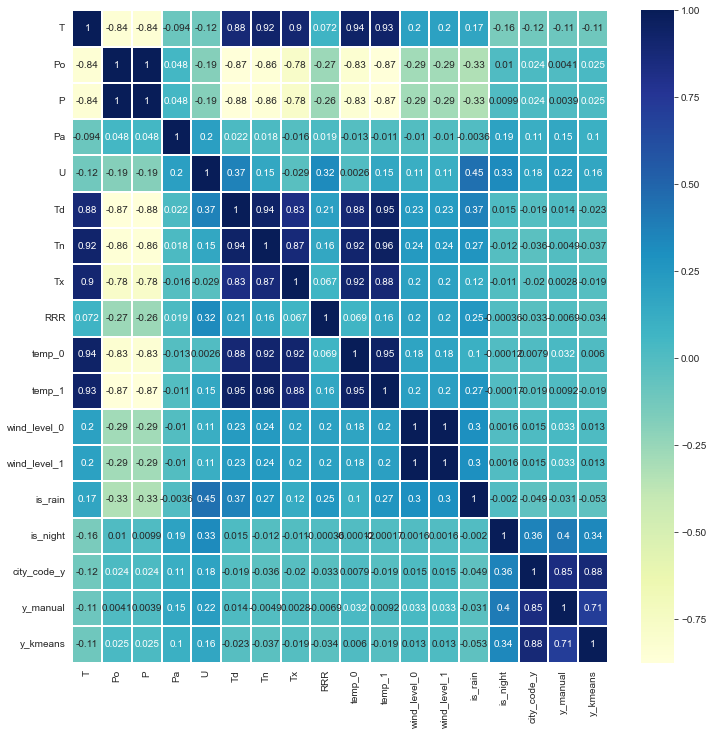

In [225]:
sns.set_context({'figure.figsize':[12, 12]})
fy_mm_corr = fy_mm_df.corr()
sns.heatmap(fy_mm_corr, cmap = 'YlGnBu', annot = True, linewidths = 0.05)

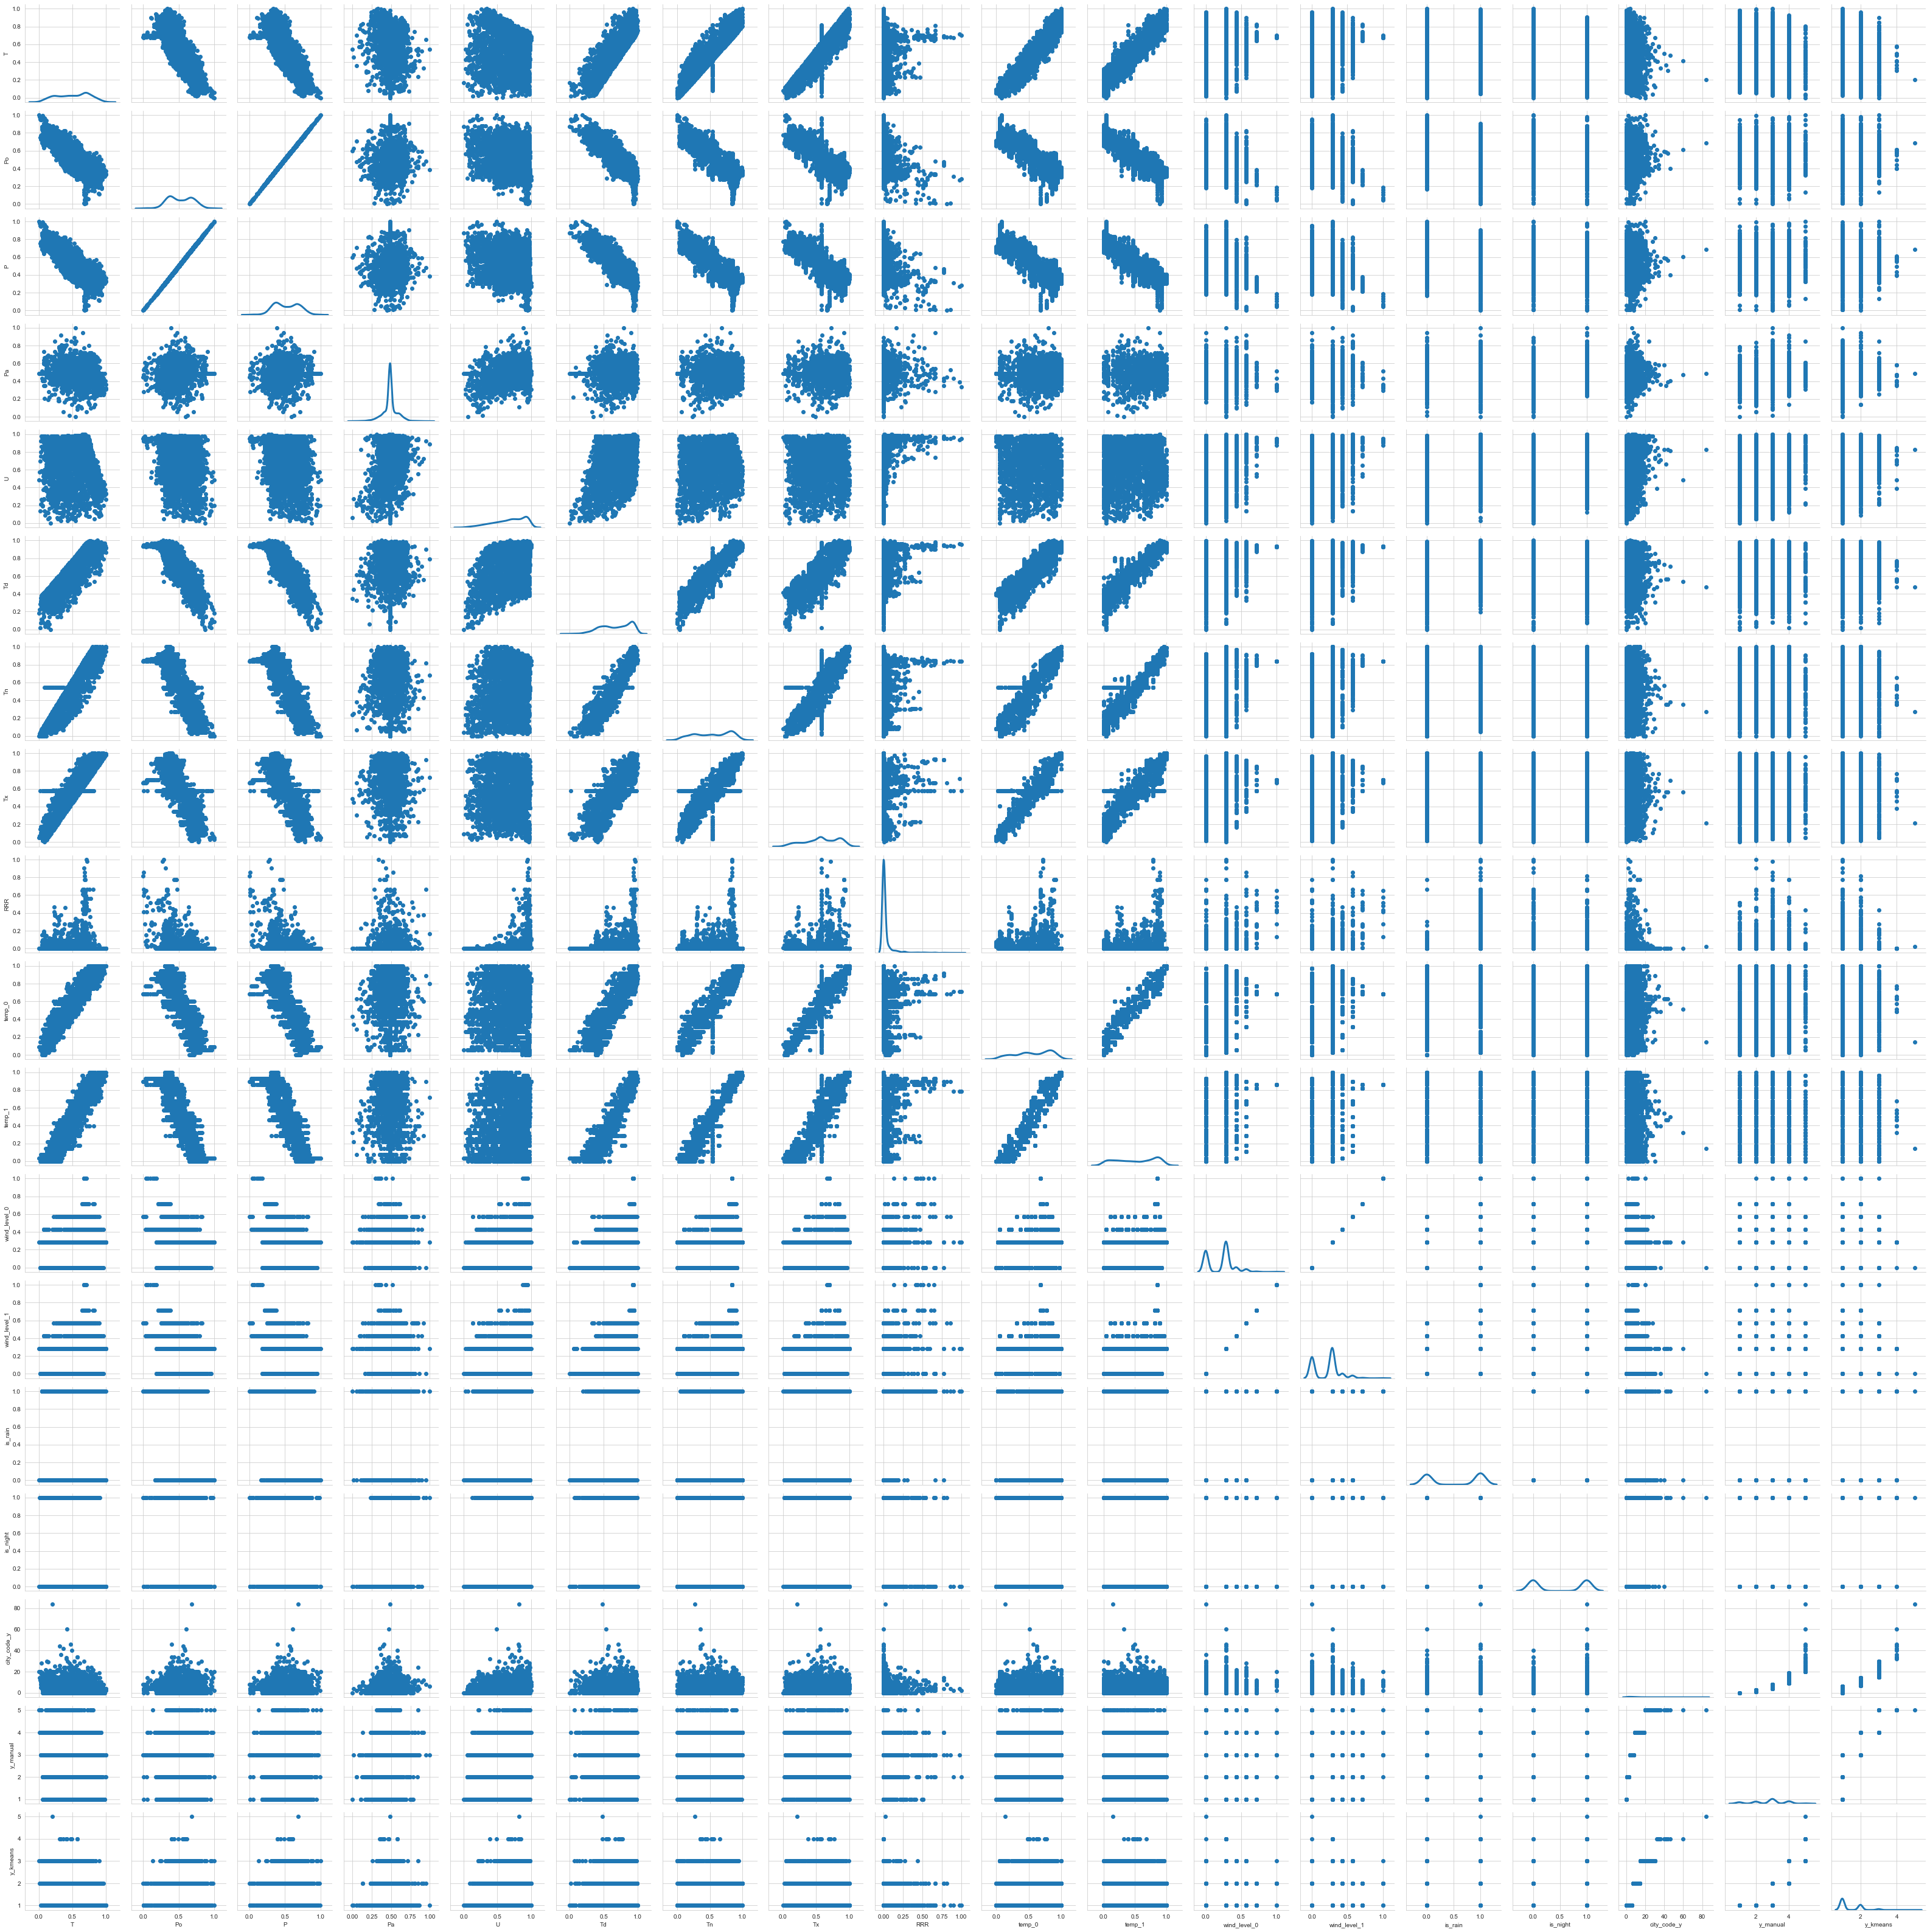

In [226]:
g_fy_mm = sns.PairGrid(fy_mm_df)
g_fy_mm.map_diag(sns.kdeplot, lw = 3)
g_fy_mm.map_offdiag(plt.scatter)
plt.show()

In [227]:
n_total = f_mm_df.shape[0]
n_test = 240
n_train = n_total - n_test
n_total, n_train, n_test

(2950, 2710, 240)

In [228]:
f_train = f_mm_df[0:n_train] # n_train is not included
f_test = f_mm_df[n_train:n_total]
y_manual_train = fy_mm_df.loc[0:(n_train-1), "y_manual"] # n_train-1 is included
y_manual_test = fy_mm_df.loc[n_train:(n_total-1), "y_manual"]
y_kmeans_train = fy_mm_df.loc[0:(n_train-1), "y_kmeans"] # n_train-1 is included
y_kmeans_test = fy_mm_df.loc[n_train:(n_total-1), "y_kmeans"]
print(f_train.shape, y_manual_train.shape)
print(f_test.shape, y_manual_test.shape)
print(f_train.shape, y_kmeans_train.shape)
print(f_test.shape, y_kmeans_test.shape)

(2710, 15) (2710,)
(240, 15) (240,)
(2710, 15) (2710,)
(240, 15) (240,)


In [229]:
import xgboost as xgb

In [235]:
xgb_manual_f = xgb.XGBClassifier(n_estimators = 100, max_depth = 7,
                                 objective = 'multi:softmax', num_class = 5,
                                 booster = 'gbtree', gamma = 5, random_state = 1)
xgb_manual_f.get_params()
xgb_manual_f.fit(f_train, y_manual_train - 1)
# Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1. 2. 3. 4. 5.]
# needs to -1 for ground truth y
fy_pred_manual_xgb = xgb_manual_f.predict(f_test)
xgb_manual_f.score(f_test, y_manual_test - 1)

0.48333333333333334

### Setting gamma = 5 gives higher accuracy, 11% increase of accuracy. But it detects less data pattern, which means that it tends to predict the class of the most number of data points. We may decide not to set this value.


### However, gamma = 5 gives 11% increase of accuracy, but only 1% decrease of within-one-level prediction accuracy。 Therefore, it is also reasonable o set this value.

In [236]:
xgb_manual_f.get_params()

{'objective': 'multi:softmax',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 5,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 7,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 1,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'num_class': 5}

Text(0, 0.5, 'fire level')

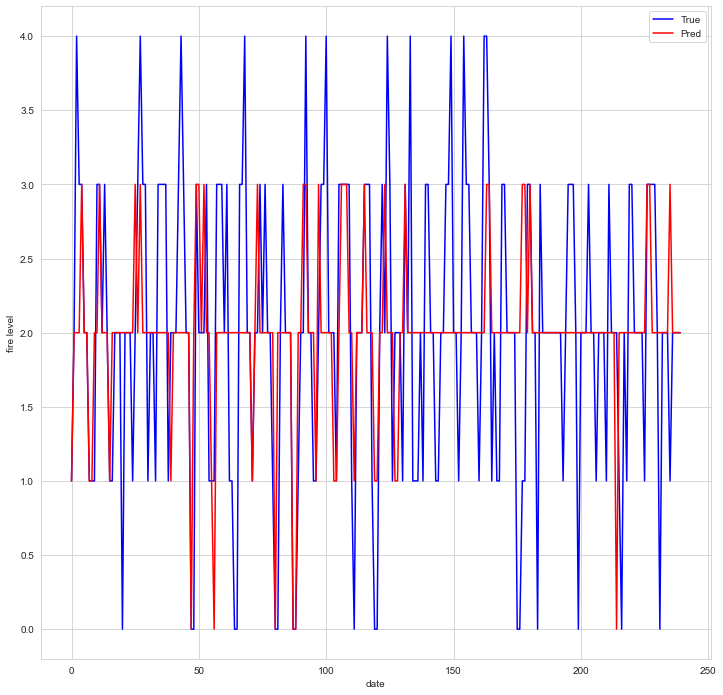

In [237]:
plt.plot(np.array(y_manual_test - 1), color = "blue")
plt.plot(fy_pred_manual_xgb, color = "red")
plt.legend(["True", "Pred"])
plt.xlabel("date")
plt.ylabel("fire level")

### Adding three more features 'Ff', 'ff3', 'VV', we can reach the highest accuracy 45% with max_depth = 7 and gamma = 5. It seems only a bit less than 48.3%. However, when we plot the prediction results, it still predicts the class of the most number of data points and cannot detect the pattern not belonging to this class. Therefore, we decide not to add these three features.

In [238]:
One_Accuracy(y_manual_test, fy_pred_manual_xgb, 'xgb')

0.4166666666666667

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

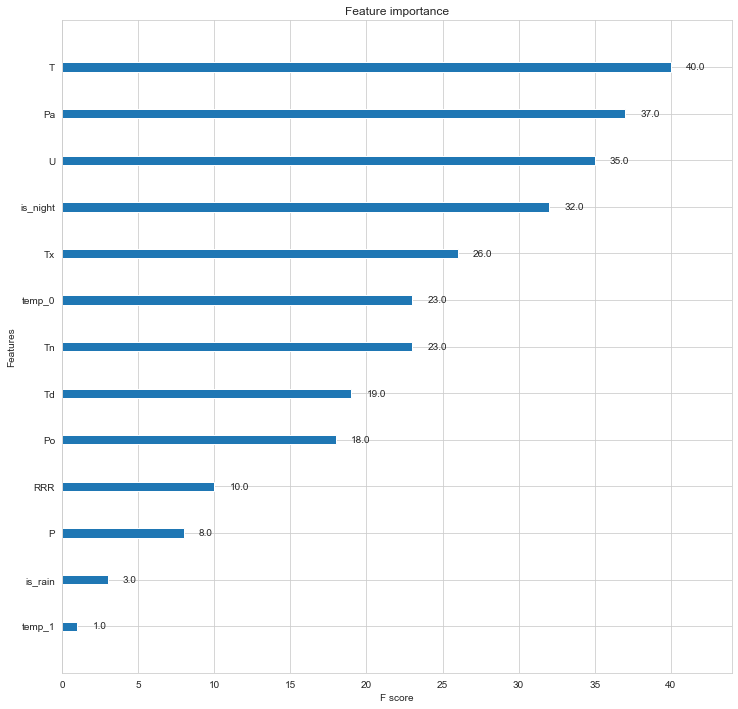

In [239]:
xgb.plot_importance(xgb_manual_f)

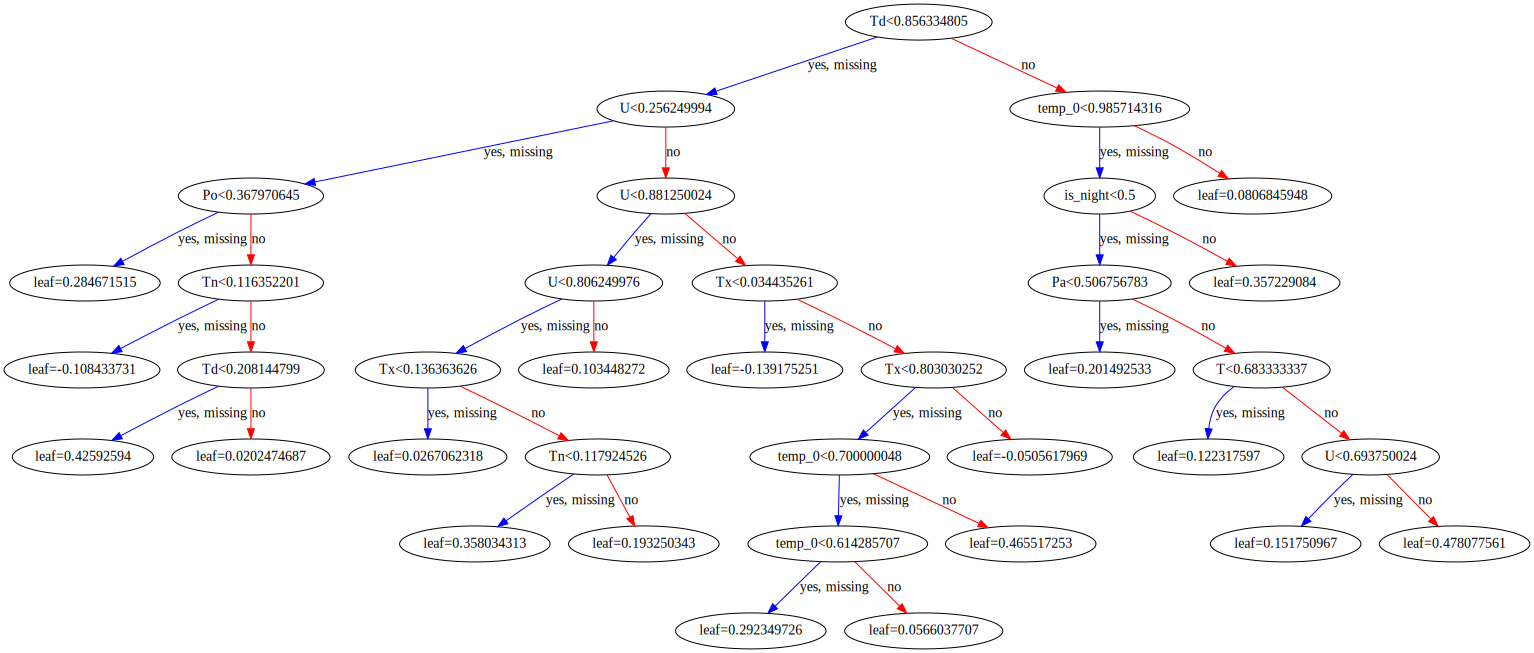

In [240]:
# xgb.plot_tree(xgb_manual_f, num_trees = 2)
xgb.to_graphviz(xgb_manual_f, num_trees = 2)

In [241]:
xgb_kmeans_f = xgb.XGBClassifier(n_estimators = 100, max_depth = 9,
                                 objective = 'multi:softmax', num_class = 5,
                                 booster = 'gbtree', gamma = 6, random_state = 1)
xgb_kmeans_f.fit(f_train, y_kmeans_train - 1)
# Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1. 2. 3. 4. 5.]
# needs to -1 for ground truth y
fy_pred_kmeans_xgb = xgb_kmeans_f.predict(f_test)
xgb_kmeans_f.score(f_test, y_kmeans_test - 1)

0.6375

In [242]:
xgb_kmeans_f.get_params()

{'objective': 'multi:softmax',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 6,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 9,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 1,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'num_class': 5}

Text(0, 0.5, 'fire level')

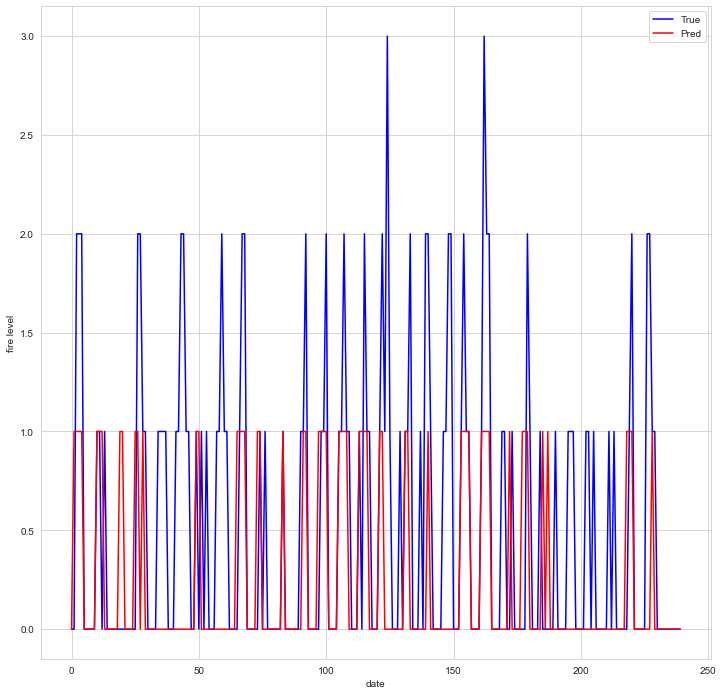

In [243]:
plt.plot(np.array(y_kmeans_test - 1), color = "blue")
plt.plot(fy_pred_kmeans_xgb, color = "red")
plt.legend(["True", "Pred"])
plt.xlabel("date")
plt.ylabel("fire level")

In [244]:
One_Accuracy(y_kmeans_test, fy_pred_kmeans_xgb, 'xgb')

0.3125

In [147]:
from sklearn.svm import SVC

In [152]:
svc_manual_f = SVC(C = 1, kernel = 'sigmoid', random_state = 1)
svc_manual_f.fit(f_train, y_manual_train)
fy_pred_manual_svc = svc_manual_f.predict(f_test)
svc_manual_f.score(f_test, y_manual_test)

0.275

Text(0, 0.5, 'fire level')

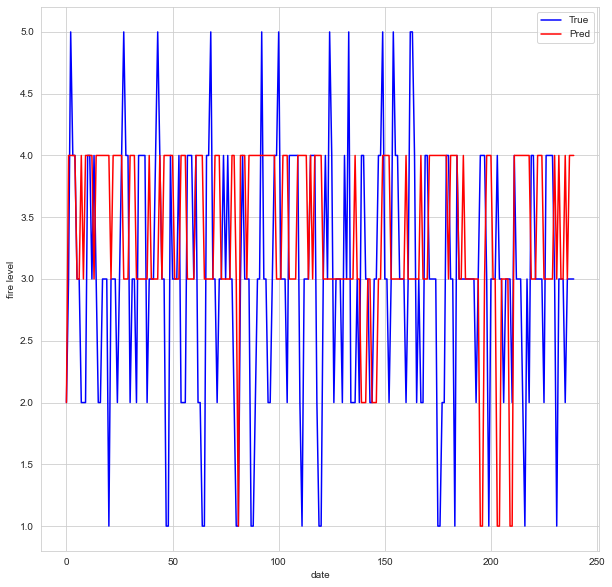

In [153]:
plt.plot(np.array(y_manual_test), color = "blue")
plt.plot(fy_pred_manual_svc, color = "red")
plt.legend(["True", "Pred"])
plt.xlabel("date")
plt.ylabel("fire level")

In [154]:
One_Accuracy(y_manual_test, fy_pred_manual_svc, 'svc')

0.4708333333333333

In [155]:
svc_kmeans_f = SVC(C = 1, kernel = "sigmoid", random_state = 1)
svc_kmeans_f.fit(f_train, y_kmeans_train)
fy_pred_kmeans_svc = svc_kmeans_f.predict(f_test)
svc_kmeans_f.score(f_test, y_kmeans_test)

0.6416666666666667

Text(0, 0.5, 'fire level')

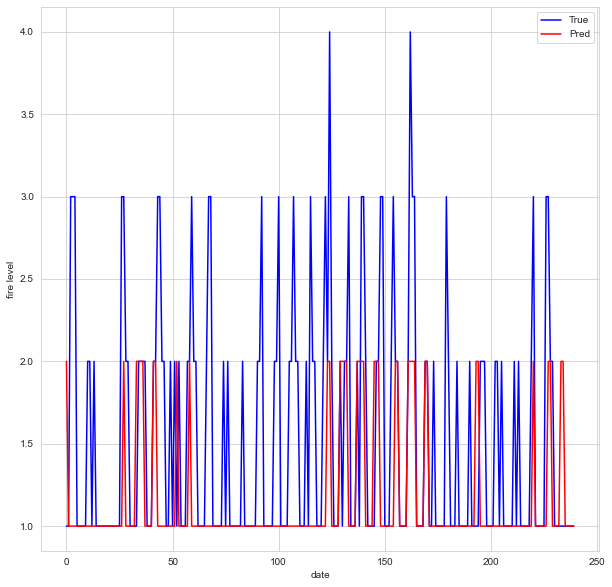

In [156]:
plt.plot(np.array(y_kmeans_test), color = "blue")
plt.plot(fy_pred_kmeans_svc, color = "red")
plt.legend(["True", "Pred"])
plt.xlabel("date")
plt.ylabel("fire level")

In [157]:
One_Accuracy(y_kmeans_test, fy_pred_kmeans_svc, 'svc')

0.26666666666666666

In [158]:
from sklearn.neural_network import MLPClassifier

In [159]:
mlp_manual_f = MLPClassifier(max_iter = 500, random_state = 1)
mlp_manual_f.fit(f_train, y_manual_train)
fy_pred_manual_mlp = mlp_manual_f.predict(f_test)
mlp_manual_f.score(f_test, y_manual_test)

0.4041666666666667

Text(0, 0.5, 'fire level')

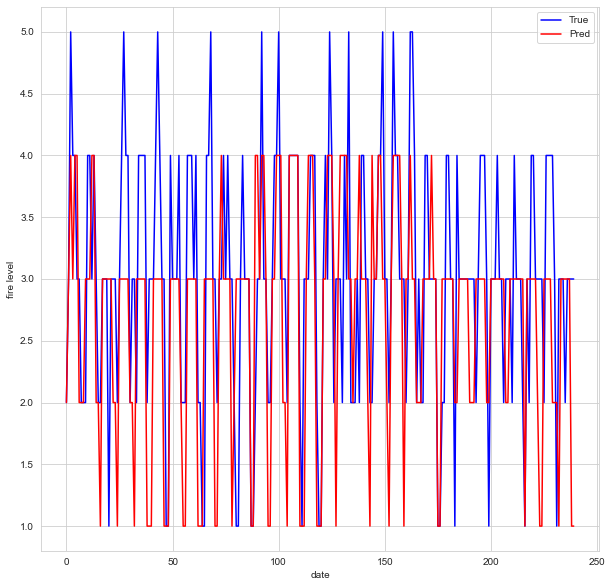

In [160]:
plt.plot(np.array(y_manual_test), color = "blue")
plt.plot(fy_pred_manual_mlp, color = "red")
plt.legend(["True", "Pred"])
plt.xlabel("date")
plt.ylabel("fire level")

In [161]:
One_Accuracy(y_manual_test, fy_pred_manual_mlp, 'mlp')

0.4708333333333333

In [162]:
mlp_kmeans_f = MLPClassifier(max_iter = 500, random_state = 1)
mlp_kmeans_f.fit(f_train, y_kmeans_train)
fy_pred_kmeans_mlp = mlp_kmeans_f.predict(f_test)
mlp_kmeans_f.score(f_test, y_kmeans_test)

0.6541666666666667

Text(0, 0.5, 'fire level')

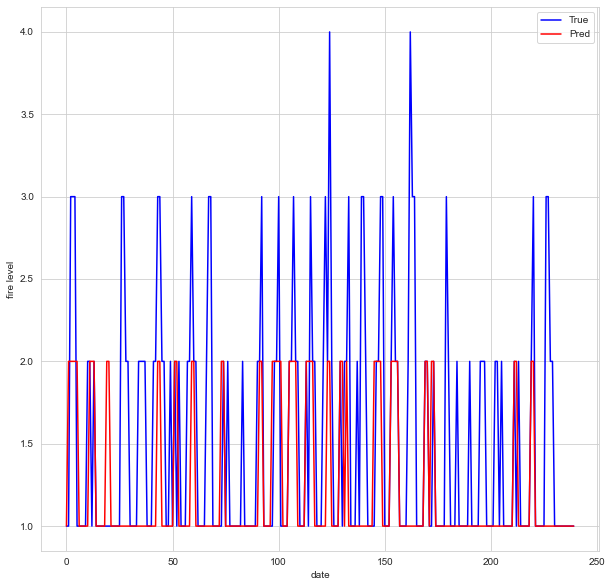

In [163]:
plt.plot(np.array(y_kmeans_test), color = "blue")
plt.plot(fy_pred_kmeans_mlp, color = "red")
plt.legend(["True", "Pred"])
plt.xlabel("date")
plt.ylabel("fire level")

In [164]:
One_Accuracy(y_kmeans_test, fy_pred_kmeans_mlp, 'mlp')

0.2791666666666667